In [ ]:
# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

#dataframe
import pandas as pd

# Splitting data
from sklearn.model_selection import train_test_split

# Metrics 
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
import os
import numpy as np

#Data Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#model layers
from tensorflow.keras.models import Model,Sequential,load_model
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, BatchNormalization, Dropout, Flatten, Conv2D,MaxPool2D
from tensorflow.keras.applications.resnet import ResNet50

#callbcks
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

#image preprocessing
from PIL import Image
import cv2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
df_Traffic = pd.read_csv('/content/drive/MyDrive/DBDA_PROJECT/archive/labelscsv.csv')
df_Traffic.head()


CLASS_ID                  NAME
0         0  Speed limit (20km/h)
1         1  Speed limit (30km/h)
2         2  Speed limit (50km/h)
3         3  Speed limit (60km/h)
4         4  Speed limit (70km/h)

# **total number of images**

In [ ]:
#total number of images 

num_imgs = 0

for i in range(43):
    for img in os.listdir('/content/drive/MyDrive/DBDA_PROJECT/archive/Train/'+str(i)+'/'):
        num_imgs += 1
        
print("number of images in the dataset {}".format(num_imgs))


number of images in the dataset 39249


# **number of images belonging to each classes visuals**

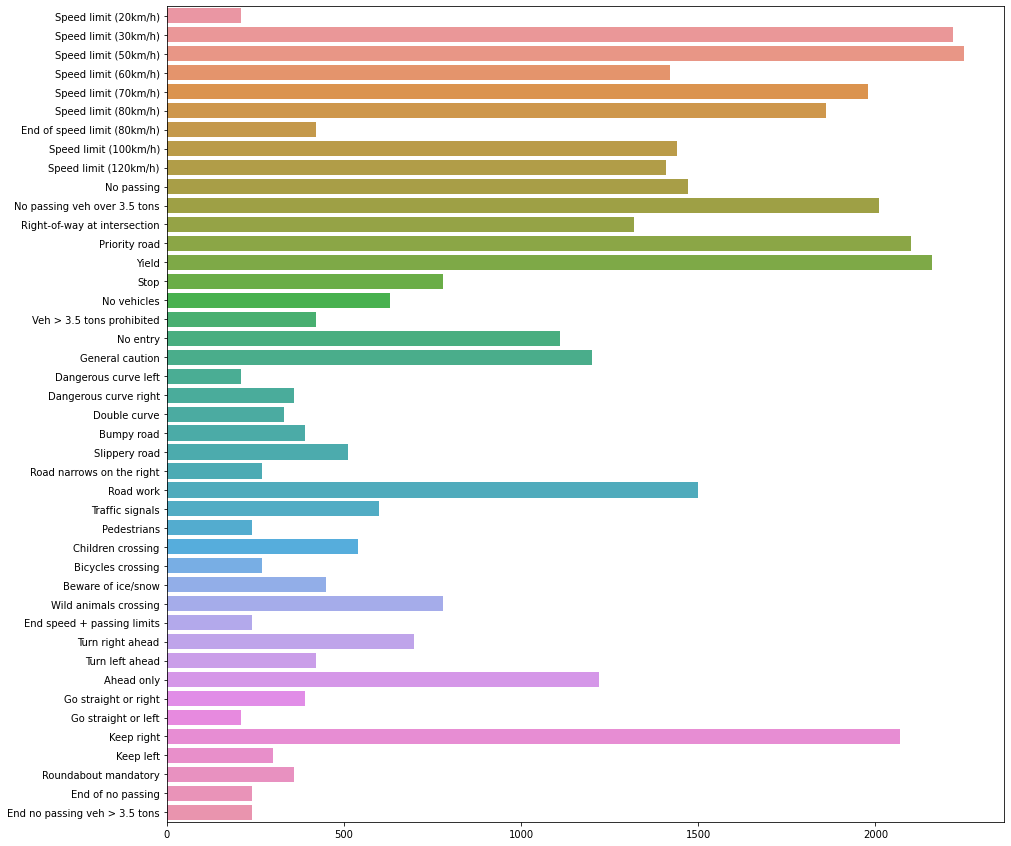

In [ ]:
#number of images belonging to each classes

num_of_imgs = dict()

for labels in range(43):
    imgs = 0
    for img in os.listdir('/content/drive/MyDrive/DBDA_PROJECT/archive/Train/' + str(labels) + '/'):
        imgs += 1
        
    num_of_imgs[df_Traffic['NAME'][labels]] = imgs
    
X = list(num_of_imgs.keys())
Y = list(num_of_imgs.values())

plt.figure(figsize=(15, 15))
sns.barplot(y = X,
            x = Y
           )
 

## **Loading Dataset.**

In [ ]:
datagen = ImageDataGenerator()

In [ ]:
data = datagen.flow_from_directory('/content/drive/MyDrive/DBDA_PROJECT/archive/Train/',
                                    target_size=(32, 32),
                                    batch_size=39249,
                                    class_mode='categorical',
                                    shuffle=True,
                                    seed=42)

Found 39249 images belonging to 43 classes.


In [ ]:
X , y = data.next()

In [ ]:
print(f"Data Shape   :{X.shape}\nLabels shape :{y.shape}")

Data Shape   :(39249, 32, 32, 3)
Labels shape :(39249, 43)


In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
# Save Labels & Data for future use
# os.mkdir('/content/drive/MyDrive/DBDA_PROJECT/training')
os.mkdir('/content/drive/MyDrive/DBDA_PROJECT/training/dir_data')
os.mkdir('/content/drive/MyDrive/DBDA_PROJECT/training/dir_target')


In [ ]:
np.save('/content/drive/MyDrive/DBDA_PROJECT/training/dir_data', X)
np.save('/content/drive/MyDrive/DBDA_PROJECT/training/dir_target', y)

In [ ]:
# Load data & Labels
X=np.load('/content/drive/MyDrive/DBDA_PROJECT/training/dir_data.npy')
y=np.load('/content/drive/MyDrive/DBDA_PROJECT/training/dir_target.npy')

In [ ]:
print(f"Data Shape   :{X.shape}\nLabels shape :{y.shape}")

Data Shape   :(39249, 32, 32, 3)
Labels shape :(39249, 43)


## **Display image in each class**

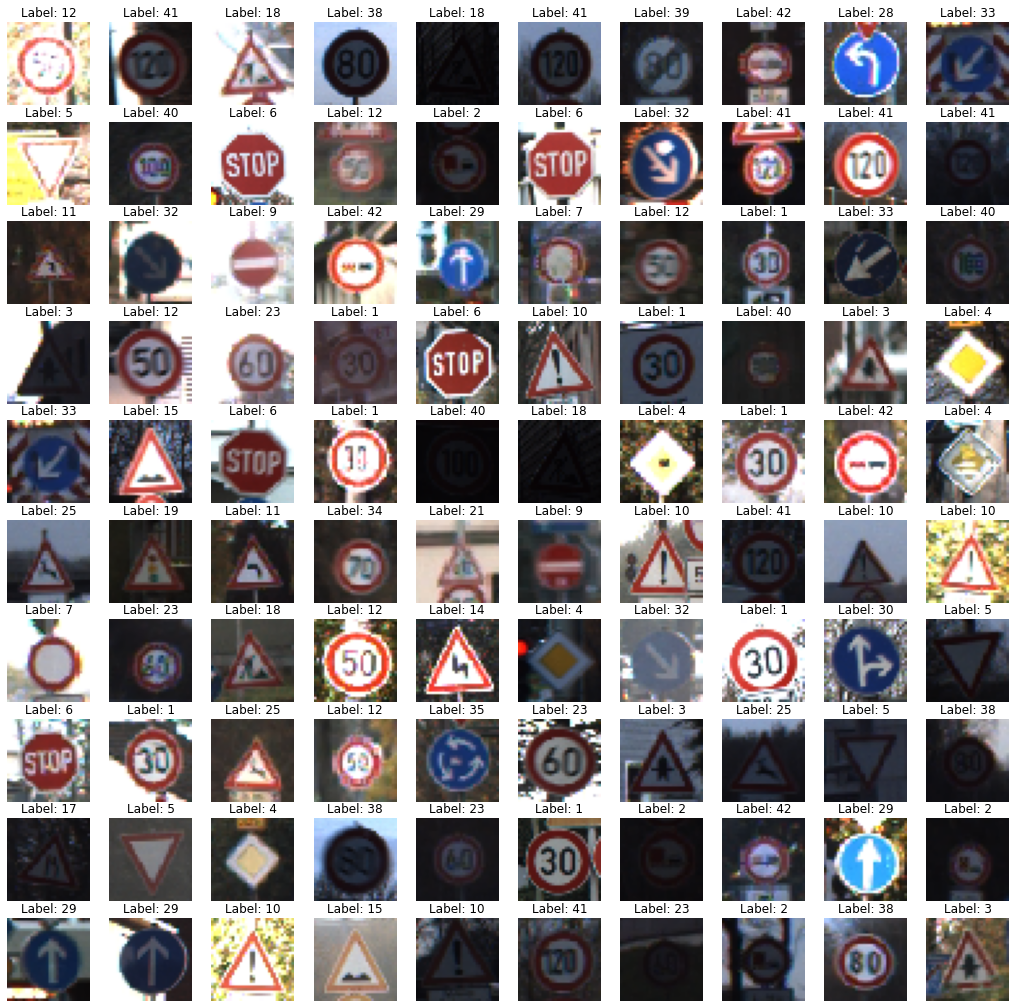

In [ ]:
fig, axes = plt.subplots(10,10, figsize=(18,18))
for i,ax in enumerate(axes.flat):
    r = np.random.randint(X.shape[0])
    ax.imshow(X[r].astype('uint8'))
    ax.grid(False)
    ax.axis('off')
    ax.set_title('Label: '+str(np.argmax(y[r])))


# **Spliting Data**



In [ ]:
X_train_m, X_test, y_train_m, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print("Train Shape: {}\nTest Shape : {}".format(X_train_m.shape, X_test.shape))


Train Shape: (31399, 32, 32, 3)
Test Shape : (7850, 32, 32, 3)


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train_m, y_train_m, test_size=0.2, random_state=42)

In [ ]:
print("X_Train Shape: {}\nX_Validation Shape : {}".format(X_train.shape, X_val.shape))

X_Train Shape: (25119, 32, 32, 3)
X_Validation Shape : (6280, 32, 32, 3)


In [ ]:
print("y_Train Shape: {}\ny_Validation Shape : {}".format(y_train.shape, y_val.shape))

y_Train Shape: (25119, 43)
y_Validation Shape : (6280, 43)


# Preprocess

### 1.   Image Rotation




In [ ]:
import random

In [ ]:
X_test_c90=X_test

In [ ]:
dataGen = ImageDataGenerator(rotation_range=90)  # DEGREES
dataGen.fit(X_test_c90)

In [ ]:
X_test_c90.shape

(7850, 32, 32, 3)

In [ ]:
X_test_ac90=X_test

In [ ]:
dataGen = ImageDataGenerator(rotation_range=-90)  # DEGREES
dataGen.fit(X_test_ac90)

In [ ]:
X_test_ac90.shape

(7850, 32, 32, 3)

In [ ]:
X_test_c180=X_test

In [ ]:
dataGen = ImageDataGenerator(rotation_range=180)  # DEGREES
dataGen.fit(X_test_c180)

In [ ]:
X_test_c180.shape

(7850, 32, 32, 3)

In [ ]:
d=random.choice(X_test_c180)

In [ ]:
d

array([[[18., 21., 29.],
        [19., 21., 29.],
        [19., 21., 29.],
        ...,
        [35., 45., 57.],
        [41., 50., 66.],
        [45., 54., 71.]],

       [[17., 20., 28.],
        [18., 20., 28.],
        [19., 21., 29.],
        ...,
        [39., 48., 60.],
        [48., 56., 73.],
        [58., 65., 87.]],

       [[17., 20., 27.],
        [18., 20., 27.],
        [19., 21., 29.],
        ...,
        [47., 55., 64.],
        [49., 56., 67.],
        [41., 47., 61.]],

       ...,

       [[31., 27., 37.],
        [24., 23., 31.],
        [19., 20., 28.],
        ...,
        [40., 46., 62.],
        [41., 46., 62.],
        [41., 46., 61.]],

       [[33., 31., 42.],
        [24., 24., 32.],
        [21., 22., 30.],
        ...,
        [42., 48., 62.],
        [40., 46., 61.],
        [41., 47., 61.]],

       [[32., 32., 42.],
        [25., 25., 32.],
        [23., 24., 31.],
        ...,
        [40., 47., 61.],
        [40., 47., 61.],
        [38., 46., 60.]]

[]

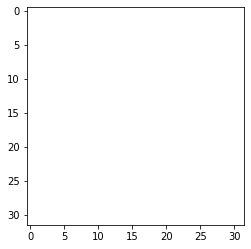

In [ ]:
plt.figure()
plt.imshow(d) 
plt.plot()  # display it

# Build model for unbalanced data using CNN


## Model 1 CNN





In [ ]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
# We have 43 classes that's why we have defined 43 in the dense
model.add(Dense(43, activation='softmax'))

In [ ]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 64)          36928     
                                                        

In [ ]:
epochs = 25
history = model.fit(X_train, y_train, batch_size=64, epochs=epochs, validation_data=(X_val, y_val))

Epoch 1/25
393/393 [==============================] - 15s 8ms/step - loss: 3.7761 - accuracy: 0.0526 - val_loss: 3.4645 - val_accuracy: 0.0728
Epoch 2/25
393/393 [==============================] - 3s 7ms/step - loss: 3.5058 - accuracy: 0.0550 - val_loss: 3.4820 - val_accuracy: 0.0607
Epoch 3/25
393/393 [==============================] - 3s 6ms/step - loss: 3.5027 - accuracy: 0.0552 - val_loss: 3.4749 - val_accuracy: 0.0619
Epoch 4/25
393/393 [==============================] - 3s 7ms/step - loss: 2.4436 - accuracy: 0.3378 - val_loss: 1.0341 - val_accuracy: 0.7272
Epoch 5/25
393/393 [==============================] - 3s 7ms/step - loss: 1.0399 - accuracy: 0.6873 - val_loss: 0.4271 - val_accuracy: 0.8691
Epoch 6/25
393/393 [==============================] - 4s 10ms/step - loss: 0.7039 - accuracy: 0.7841 - val_loss: 0.3264 - val_accuracy: 0.9081
Epoch 7/25
393/393 [==============================] - 3s 7ms/step - loss: 0.5303 - accuracy: 0.8382 - val_loss: 0.2385 - val_accuracy: 0.9298
Epoc

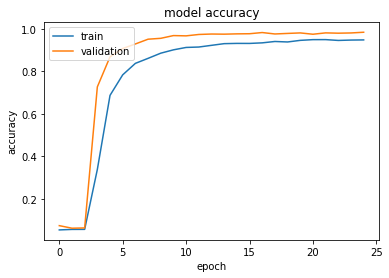

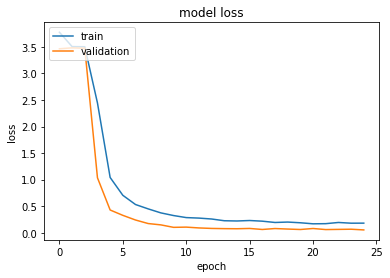

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Clockwise rotation

In [ ]:
Y_pred_c90 = np.argmax(model.predict(X_test_c90), axis=1)

In [ ]:
Y_pred_c90

array([23, 25, 27, ..., 23, 41,  9])

In [ ]:
# Classification metrics can't handle a mix of multilabel-indicator and multiclass targets
y_test_arg=np.argmax(y_test,axis=1)

anti-clockwise rotation

In [ ]:
Y_pred_ac90 = np.argmax(model.predict(X_test_ac90), axis=1)

In [ ]:
Y_pred_ac90

array([23, 25, 27, ..., 23, 41,  9])

In [ ]:
y_test_arg=np.argmax(y_test,axis=1)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test_arg, Y_pred_ac90))

0.9828025477707006


180 rotation

In [ ]:
Y_pred_180 = np.argmax(model.predict(X_test_c180), axis=1)

In [ ]:
Y_pred_180
# Classification metrics can't handle a mix of multilabel-indicator and multiclass targets
y_test_arg=np.argmax(y_test,axis=1)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test_arg, Y_pred_180))

0.9828025477707006


classification report for clockwise

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
# print(classification_report(y_test_arg, Y_pred_c90 ))

confusion matrix

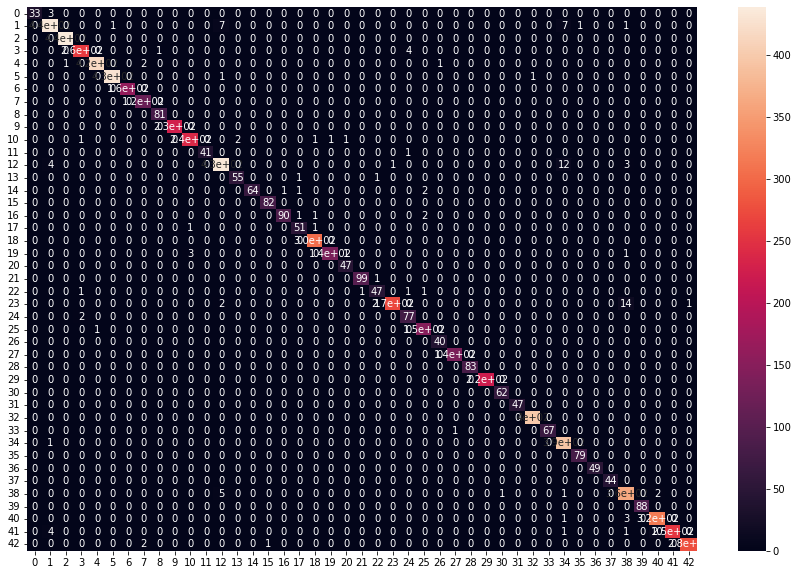

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn.metrics as metrics
import seaborn as sns
cm_c = metrics.confusion_matrix(y_test_arg, Y_pred_c90)
plt.figure(figsize=(15,10))
sns.heatmap(cm_c, annot=True,)
plt.show()

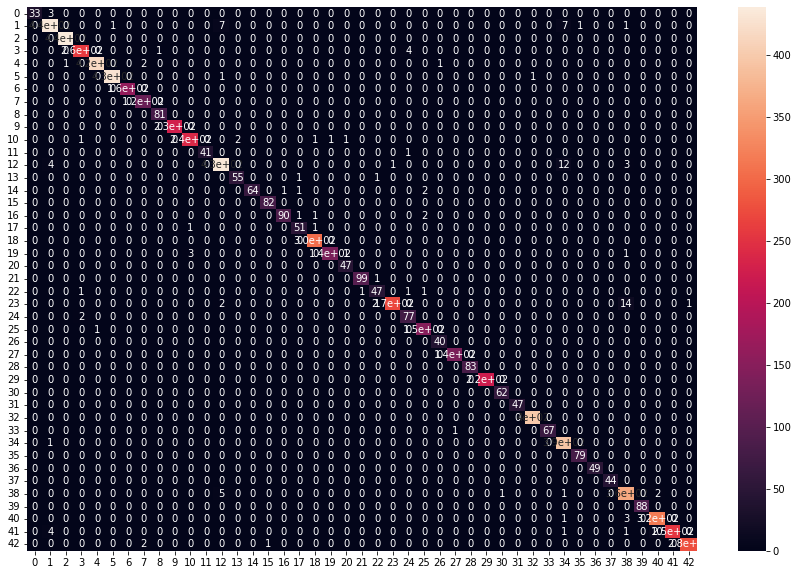

In [ ]:
cm_ac = metrics.confusion_matrix(y_test_arg,Y_pred_ac90)
plt.figure(figsize=(15,10))
sns.heatmap(cm_ac, annot=True,)
plt.show()

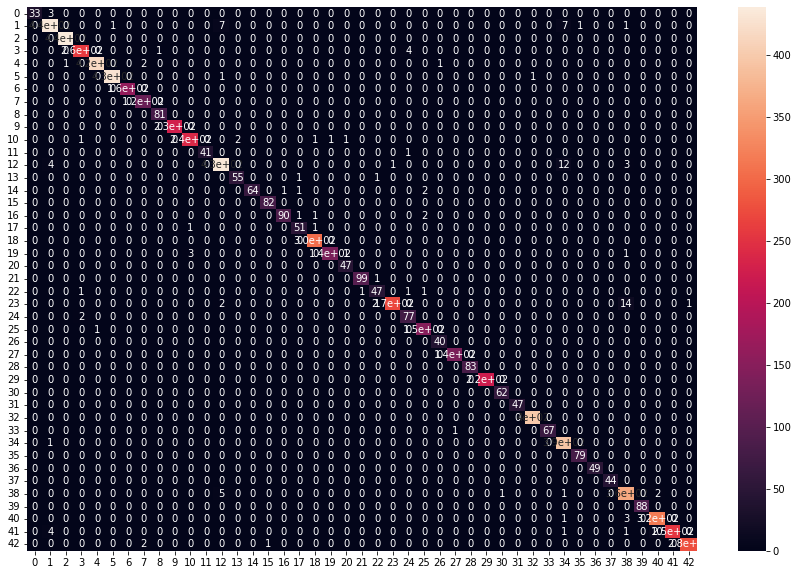

In [ ]:
cm_mr = metrics.confusion_matrix(y_test_arg, Y_pred_180 )
plt.figure(figsize=(15,10))
sns.heatmap(cm_mr, annot=True,)
plt.show()

In [ ]:
# class-wise accuracy

In [ ]:
CLASS_ID = df_Traffic['CLASS_ID'].tolist()
classwise_acc = cm_c.diagonal()/cm_c.sum(axis=1) * 100
imbalance_cnn_acc1_clock=classwise_acc.tolist()
# cls_acc = pd.DataFrame({'Class_Label':[CLASS_ID[i] for i in range(43)], 'Accuracy': imbalance_cnn_acc1}, columns = ['Class_Label', 'Accuracy'])
# cls_acc.style.format({"Accuracy": "{:,.2f}",}).hide_index().bar(subset=["Accuracy"], color='tomato')

In [ ]:
CLASS_ID = df_Traffic['CLASS_ID'].tolist()
classwise_acc = cm_ac.diagonal()/cm_ac.sum(axis=1) * 100
imbalance_cnn_acc1_anticlock=classwise_acc.tolist()
# cls_acc = pd.DataFrame({'Class_Label':[CLASS_ID[i] for i in range(43)], 'Accuracy': imbalance_cnn_acc1}, columns = ['Class_Label', 'Accuracy'])
# cls_acc.style.format({"Accuracy": "{:,.2f}",}).hide_index().bar(subset=["Accuracy"], color='tomato')

In [ ]:
CLASS_ID = df_Traffic['CLASS_ID'].tolist()
classwise_acc = cm_mr.diagonal()/cm_mr.sum(axis=1) * 100
imbalance_cnn_acc1_180=classwise_acc.tolist()
# cls_acc = pd.DataFrame({'Class_Label':[CLASS_ID[i] for i in range(43)], 'Accuracy': imbalance_cnn_acc1}, columns = ['Class_Label', 'Accuracy'])
# cls_acc.style.format({"Accuracy": "{:,.2f}",}).hide_index().bar(subset=["Accuracy"], color='tomato')

In [ ]:
zipped = list(zip(imbalance_cnn_acc1_clock,imbalance_cnn_acc1_anticlock,imbalance_cnn_acc1_180))

In [ ]:
df1= pd.DataFrame(zipped, columns=['clockwise_90', 'anticlockwise_90', 'rotation_180'])

In [ ]:
df1

clockwise_90  anticlockwise_90  rotation_180
0      91.666667         91.666667     91.666667
1      96.255507         96.255507     96.255507
2     100.000000        100.000000    100.000000
3      98.113208         98.113208     98.113208
4      99.049881         99.049881     99.049881
5      99.537037         99.537037     99.537037
6     100.000000        100.000000    100.000000
7     100.000000        100.000000    100.000000
8     100.000000        100.000000    100.000000
9     100.000000        100.000000    100.000000
10     97.560976         97.560976     97.560976
11     97.619048         97.619048     97.619048
12     95.594714         95.594714     95.594714
13     96.491228         96.491228     96.491228
14     94.117647         94.117647     94.117647
15    100.000000        100.000000    100.000000
16     95.744681         95.744681     95.744681
17     96.226415         96.226415     96.226415
18    100.000000        100.000000    100.000000
19     96.453901         96.453901     96.453901
20    100.000000        100.000000    100.000000
21     99.000000         99.000000     99.000000
22     92.156863         92.156863     92.156863
23     93.793103         93.793103     93.793103
24     97.468354         97.468354     97.468354
25     99.333333         99.333333     99.333333
26    100.000000        100.000000    100.000000
27    100.000000        100.000000    100.000000
28    100.000000        100.000000    100.000000
29    100.000000        100.000000    100.000000
30    100.000000        100.000000    100.000000
31    100.000000        100.000000    100.000000
32    100.000000        100.000000    100.000000
33     98.529412         98.529412     98.529412
34     99.746835         99.746835     99.746835
35    100.000000        100.000000    100.000000
36    100.000000        100.000000    100.000000
37    100.000000        100.000000    100.000000
38     97.580645         97.580645     97.580645
39    100.000000        100.000000    100.000000
40     98.757764         98.757764     98.757764
41     94.074074         94.074074     94.074074
42     98.928571         98.928571     98.928571

In [ ]:
df1.to_csv('/content/drive/MyDrive/DBDA_PROJECT/img_rotation/imbalanced_cnn.csv',encoding = 'utf-8-sig')

In [ ]:
# from sklearn.metrics import precision_score,recall_score,f1_score

In [ ]:
# # accuracy: (tp + tn) / (p + n)
# accuracy = accuracy_score(y_test_arg, Y_pred)
# print('Accuracy: %f' % accuracy)
# # precision tp / (tp + fp)
# precision = precision_score(y_test_arg, Y_pred,average='weighted')
# print('Precision: %f' % precision)
# # recall: tp / (tp + fn)
# recall = recall_score(y_test_arg, Y_pred,average='weighted')
# print('Recall: %f' % recall)
# # f1: 2 tp / (2 tp + fp + fn)
# f1 = f1_score(y_test_arg, Y_pred,average='weighted')
# print('F1 score: %f' % f1)


Accuracy: 0.962930
Precision: 0.964501
Recall: 0.962930
F1 score: 0.962771


In [ ]:
# mod="imbalanced_cnn"
# data = np.array([[mod,accuracy,precision,recall,f1]]) 
# df = pd.DataFrame(data, columns = ['Model','Accuracy', 'Precision','Recall', 'F1 Score'])
# df

Model            Accuracy           Precision              Recall  \
0  imbalanced_cnn  0.9629299363057325  0.9645008113924055  0.9629299363057325   

             F1 Score  
0  0.9627711856207994

In [ ]:
# # saving the dataframe
# df.to_csv('/content/drive/MyDrive/DBDA_PROJECT/Gaussian_noise/imbalanced_cnn1.csv',encoding = 'utf-8-sig')

In [ ]:
# # saving the model
# model.save("/content/drive/MyDrive/DBDA_PROJECT/Gaussian_noise/imbalanced_cnn.h5")

In [ ]:
# # saving classification report to csv
# clsf_report = pd.DataFrame(classification_report(y_true = y_test_arg, y_pred =  Y_pred, output_dict=True)).transpose()
# clsf_report.to_csv('/content/drive/MyDrive/DBDA_PROJECT/Gaussian_noise/imbalanced_cnn.csv', index= True)


## model 2 - ResNet50 with 152 layers


In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [ ]:
resnet_preTrained = tf.keras.applications.ResNet50V2(
    include_top=False,
    weights=None,
    input_shape=(32,32, 3),
)

In [ ]:
#taking 152th layer of resnet50V2 as an output layer
x = resnet_preTrained.layers[152].output
x = Flatten()(x)                                       #flattening
x = Dropout(0.1)(x)                                    #dropout
output = Dense(43, activation= 'softmax')(x)
model1 = Model(inputs = resnet_preTrained.input, outputs = output)
model1.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 pool1_pad (ZeroPadding2D)      (None, 18, 18, 64)   0           ['conv1_conv[0][0]']             
                                                                                              

In [ ]:
#optimizer
optim = tf.keras.optimizers.Adam(
    learning_rate=0.001,epsilon=1e-07, amsgrad=False,
    name='Adam'
)

#compiling the model
model1.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [ ]:

#callbacks
checkpoint = ModelCheckpoint('./best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max')

early = EarlyStopping(monitor='val_accuracy', patience=5, mode='max', restore_best_weights=True)

reduceLR = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.001)



In [ ]:
#training the model
n_epochs = 25
history1 =  model1.fit(X_train, y_train,  batch_size = 256, validation_data = (X_val, y_val),epochs = n_epochs, verbose = 1)


Epoch 1/25
99/99 [==============================] - 15s 86ms/step - loss: 1.6939 - accuracy: 0.5117 - val_loss: 2.9277 - val_accuracy: 0.2500
Epoch 2/25
99/99 [==============================] - 7s 75ms/step - loss: 0.4572 - accuracy: 0.8525 - val_loss: 0.9580 - val_accuracy: 0.7174
Epoch 3/25
99/99 [==============================] - 7s 67ms/step - loss: 0.2220 - accuracy: 0.9293 - val_loss: 0.5704 - val_accuracy: 0.8263
Epoch 4/25
99/99 [==============================] - 7s 67ms/step - loss: 0.1563 - accuracy: 0.9506 - val_loss: 0.4122 - val_accuracy: 0.8849
Epoch 5/25
99/99 [==============================] - 7s 70ms/step - loss: 0.1126 - accuracy: 0.9621 - val_loss: 0.2999 - val_accuracy: 0.9153
Epoch 6/25
99/99 [==============================] - 7s 68ms/step - loss: 0.0695 - accuracy: 0.9770 - val_loss: 0.2522 - val_accuracy: 0.9266
Epoch 7/25
99/99 [==============================] - 7s 68ms/step - loss: 0.0839 - accuracy: 0.9725 - val_loss: 0.5650 - val_accuracy: 0.8573
Epoch 8/25
9

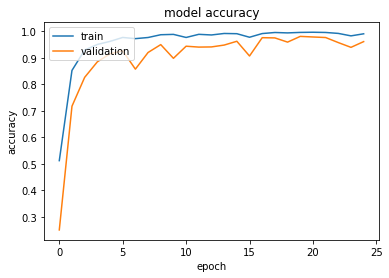

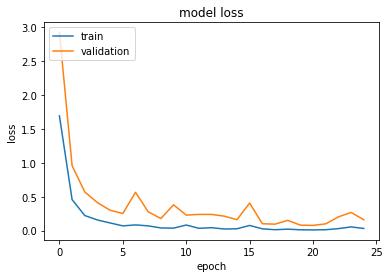

In [ ]:
# summarize history for accuracy
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [ ]:
results = model1.evaluate(X_val, y_val, batch_size=256)
# results = model.evaluate(X_test, y_test)

25/25 [==============================] - 1s 21ms/step - loss: 0.1597 - accuracy: 0.9613


In [ ]:
# clockwise
Y_pred_rn_c = np.argmax(model1.predict(X_test_c90), axis=1)
Y_pred_rn_c
y_test_arg_rn=np.argmax(y_test,axis=1)

In [ ]:
# anti-clockwise
Y_pred_rn_ac = np.argmax(model1.predict(X_test_ac90), axis=1)
Y_pred_rn_ac
y_test_arg_rn=np.argmax(y_test,axis=1)

In [ ]:
# 180 rotation
Y_pred_rn_wc = np.argmax(model1.predict(X_test_c180), axis=1)
Y_pred_rn_wc
y_test_arg_rn=np.argmax(y_test,axis=1)

In [ ]:
# print(classification_report(y_test_arg_rn, Y_pred_rn_c))

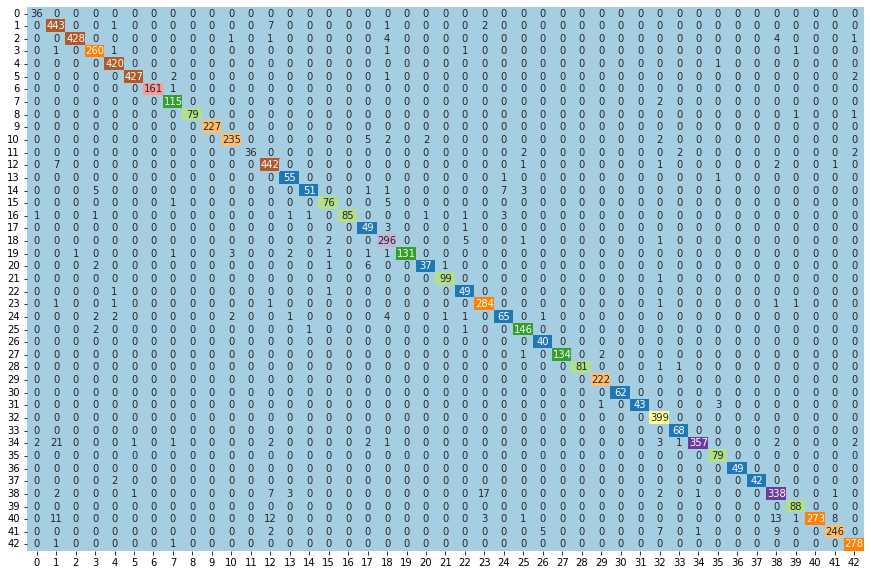

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score,confusion_matrix
import sklearn.metrics as metrics
cm2_c = metrics.confusion_matrix(y_test_arg_rn, Y_pred_rn_c)
plt.figure(figsize=(15,10))
sns.heatmap(cm2_c, annot=True,cbar = False, cmap='Paired', fmt="d")
plt.show()

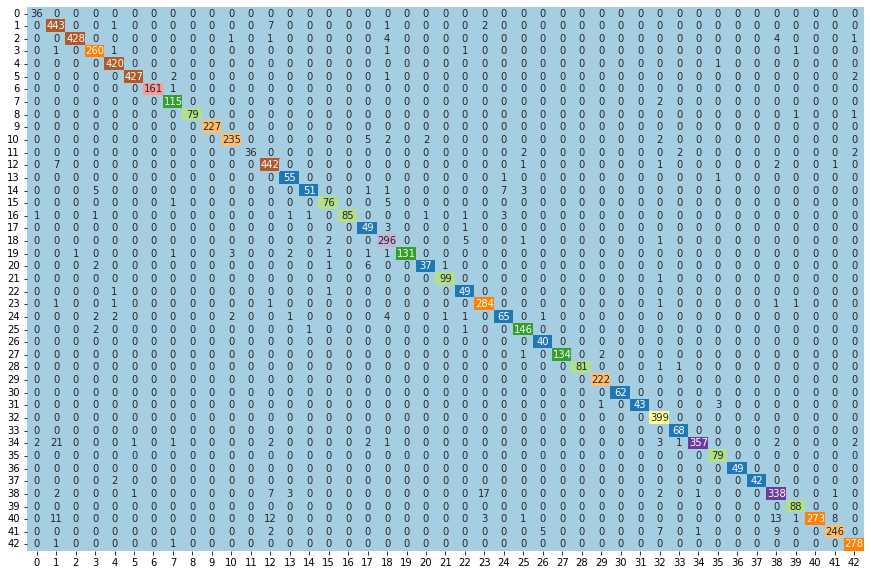

In [ ]:
cm2_ac = metrics.confusion_matrix(y_test_arg_rn, Y_pred_rn_ac)
plt.figure(figsize=(15,10))
sns.heatmap(cm2_ac, annot=True,cbar = False, cmap='Paired', fmt="d")
plt.show()

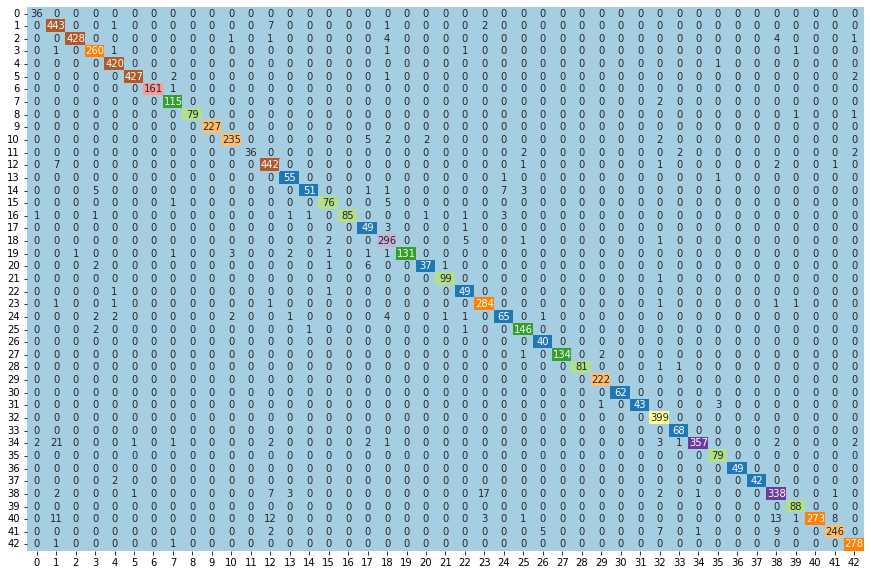

In [ ]:
cm2_wc = metrics.confusion_matrix(y_test_arg_rn, Y_pred_rn_wc)
plt.figure(figsize=(15,10))
sns.heatmap(cm2_wc, annot=True,cbar = False, cmap='Paired', fmt="d")
plt.show()

In [ ]:
CLASS_ID = df_Traffic['CLASS_ID'].tolist()
classwise_acc = cm2_c.diagonal()/cm2_c.sum(axis=1) * 100
imbalance_Resnet50_acc2_clock=classwise_acc.tolist()
# cls_acc = pd.DataFrame({'Class_Label':[CLASS_ID[i] for i in range(43)], 'Accuracy': imbalance_cnn_acc1}, columns = ['Class_Label', 'Accuracy'])
# cls_acc.style.format({"Accuracy": "{:,.2f}",}).hide_index().bar(subset=["Accuracy"], color='tomato')

In [ ]:
# CLASS_ID = df_Traffic['CLASS_ID'].tolist()
classwise_acc = cm2_ac.diagonal()/cm2_ac.sum(axis=1) * 100
imbalance_Resnet50_acc2_anticlock=classwise_acc.tolist()
# cls_acc = pd.DataFrame({'Class_Label':[CLASS_ID[i] for i in range(43)], 'Accuracy': imbalance_cnn_acc1}, columns = ['Class_Label', 'Accuracy'])
# cls_acc.style.format({"Accuracy": "{:,.2f}",}).hide_index().bar(subset=["Accuracy"], color='tomato')


In [ ]:
CLASS_ID = df_Traffic['CLASS_ID'].tolist()
classwise_acc = cm2_wc.diagonal()/cm2_wc.sum(axis=1) * 100
imbalance_Resnet50_acc2_180=classwise_acc.tolist()
# cls_acc = pd.DataFrame({'Class_Label':[CLASS_ID[i] for i in range(43)], 'Accuracy': imbalance_cnn_acc1}, columns = ['Class_Label', 'Accuracy'])
# cls_acc.style.format({"Accuracy": "{:,.2f}",}).hide_index().bar(subset=["Accuracy"], color='tomato')


In [ ]:
zipped = list(zip(imbalance_Resnet50_acc2_clock,imbalance_Resnet50_acc2_anticlock,imbalance_Resnet50_acc2_180))
df2= pd.DataFrame(zipped, columns=['clockwise_90', 'anticlockwise_90', 'rotation_180'])
df2


clockwise_90  anticlockwise_90  rotation_180
0     100.000000        100.000000    100.000000
1      97.577093         97.577093     97.577093
2      97.494305         97.494305     97.494305
3      98.113208         98.113208     98.113208
4      99.762470         99.762470     99.762470
5      98.842593         98.842593     98.842593
6      99.382716         99.382716     99.382716
7      98.290598         98.290598     98.290598
8      97.530864         97.530864     97.530864
9     100.000000        100.000000    100.000000
10     95.528455         95.528455     95.528455
11     85.714286         85.714286     85.714286
12     97.356828         97.356828     97.356828
13     96.491228         96.491228     96.491228
14     75.000000         75.000000     75.000000
15     92.682927         92.682927     92.682927
16     90.425532         90.425532     90.425532
17     92.452830         92.452830     92.452830
18     97.049180         97.049180     97.049180
19     92.907801         92.907801     92.907801
20     78.723404         78.723404     78.723404
21     99.000000         99.000000     99.000000
22     96.078431         96.078431     96.078431
23     97.931034         97.931034     97.931034
24     82.278481         82.278481     82.278481
25     97.333333         97.333333     97.333333
26    100.000000        100.000000    100.000000
27     97.810219         97.810219     97.810219
28     97.590361         97.590361     97.590361
29    100.000000        100.000000    100.000000
30    100.000000        100.000000    100.000000
31     91.489362         91.489362     91.489362
32    100.000000        100.000000    100.000000
33    100.000000        100.000000    100.000000
34     90.379747         90.379747     90.379747
35    100.000000        100.000000    100.000000
36    100.000000        100.000000    100.000000
37     95.454545         95.454545     95.454545
38     90.860215         90.860215     90.860215
39    100.000000        100.000000    100.000000
40     84.782609         84.782609     84.782609
41     91.111111         91.111111     91.111111
42     99.285714         99.285714     99.285714

In [ ]:
df2.to_csv('/content/drive/MyDrive/DBDA_PROJECT/img_rotation/imbalanced_resnet_50.csv',encoding = 'utf-8-sig')

In [ ]:
# # accuracy: (tp + tn) / (p + n)
# accuracy = accuracy_score(y_test_arg_rn, Y_pred_rn)
# print('Accuracy: %f' % accuracy)
# # precision tp / (tp + fp)
# precision = precision_score(y_test_arg_rn, Y_pred_rn,average='weighted')
# print('Precision: %f' % precision)
# # recall: tp / (tp + fn)
# recall = recall_score(y_test_arg_rn, Y_pred_rn,average='weighted')
# print('Recall: %f' % recall)
# # f1: 2 tp / (2 tp + fp + fn)
# f1 = f1_score(y_test_arg_rn, Y_pred_rn,average='weighted')
# print('F1 score: %f' % f1)


In [ ]:
# mod="imbalanced_ResNet50_152"
# data = np.array([[mod,accuracy,precision,recall,f1]]) 
# df2 = pd.DataFrame(data, columns = ['Model','Accuracy', 'Precision','Recall', 'F1 Score'])
# df2

In [ ]:
# # saving the dataframe
# df2.to_csv('/content/drive/MyDrive/DBDA_PROJECT/Gaussian_noise/imbalanced_resnet50.csv',encoding = 'utf-8-sig')

In [ ]:
# # Saving the model
# model1.save("/content/drive/MyDrive/DBDA_PROJECT/Gaussian_noise/imbalanced_RESNET_152.h5")

In [ ]:
# # saving classification report to csv
# clsf_report = pd.DataFrame(classification_report(y_true = y_test_arg_rn, y_pred = Y_pred_rn, output_dict=True)).transpose()
# clsf_report.to_csv('/content/drive/MyDrive/DBDA_PROJECT/Gaussian_noise/imbalanced_RESNET_152.csv', index= True)

### Model 3- Imbalanced ResNet50 with 50 layers

In [ ]:
# ResNet with 50 layers

In [ ]:
resnet_preTrained = tf.keras.applications.ResNet50V2(
    include_top=False,
    weights='imagenet',
    input_shape=(32,32, 3),
)

94683136/94668760 [==============================] - 1s 0us/step


In [ ]:
#taking 50th layer of resnet50V2 as an output layer
x = resnet_preTrained.layers[50].output
x = Flatten()(x)                                       #flattening
x = Dropout(0.1)(x)                                    #dropout
output = Dense(43, activation= 'softmax')(x)
model2 = Model(inputs = resnet_preTrained.input, outputs = output)
model2.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 pool1_pad (ZeroPadding2D)      (None, 18, 18, 64)   0           ['conv1_conv[0][0]']             
                                                                                            

In [ ]:
#optimizer
optim = tf.keras.optimizers.Adam(
    learning_rate=0.001,epsilon=1e-07, amsgrad=False,
    name='Adam'
)

#compiling the model
model2.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
#training the model
n_epochs = 25
history2 =  model2.fit(X_train, y_train,  batch_size = 256, validation_data = (X_val, y_val), epochs = n_epochs, verbose = 1)

Epoch 1/25
99/99 [==============================] - 4s 30ms/step - loss: 0.7316 - accuracy: 0.8113 - val_loss: 0.6026 - val_accuracy: 0.8309
Epoch 2/25
99/99 [==============================] - 3s 26ms/step - loss: 0.0652 - accuracy: 0.9799 - val_loss: 0.1230 - val_accuracy: 0.9611
Epoch 3/25
99/99 [==============================] - 3s 26ms/step - loss: 0.0253 - accuracy: 0.9928 - val_loss: 0.0691 - val_accuracy: 0.9771
Epoch 4/25
99/99 [==============================] - 3s 26ms/step - loss: 0.0204 - accuracy: 0.9940 - val_loss: 0.1727 - val_accuracy: 0.9503
Epoch 5/25
99/99 [==============================] - 3s 26ms/step - loss: 0.0180 - accuracy: 0.9949 - val_loss: 0.0787 - val_accuracy: 0.9742
Epoch 6/25
99/99 [==============================] - 3s 26ms/step - loss: 0.0130 - accuracy: 0.9959 - val_loss: 0.1512 - val_accuracy: 0.9568
Epoch 7/25
99/99 [==============================] - 3s 28ms/step - loss: 0.0081 - accuracy: 0.9971 - val_loss: 0.0673 - val_accuracy: 0.9791
Epoch 8/25
99

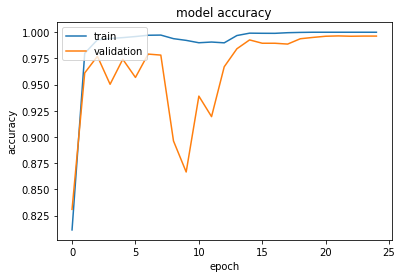

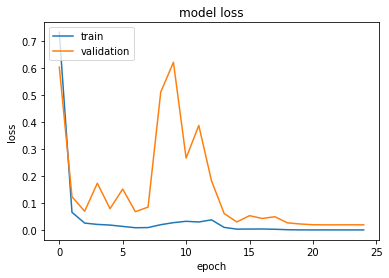

In [ ]:
# summarize history for accuracy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [ ]:
# clockwise
Y_pred_rs_c90 = np.argmax(model2.predict(X_test_c90), axis=1)
Y_pred_rs_c90
y_test_arg_rs=np.argmax(y_test,axis=1)

In [ ]:
# anti-clock
Y_pred_rs_ac90 = np.argmax(model2.predict(X_test_ac90), axis=1)
Y_pred_rs_ac90
y_test_arg_rs=np.argmax(y_test,axis=1)

In [ ]:
# 180 rotation
Y_pred_rs_180 = np.argmax(model2.predict(X_test_c180), axis=1)
Y_pred_rs_180
y_test_arg_rs=np.argmax(y_test,axis=1)

In [ ]:
# print(classification_report(y_test_arg_rs, Y_pred_rs))

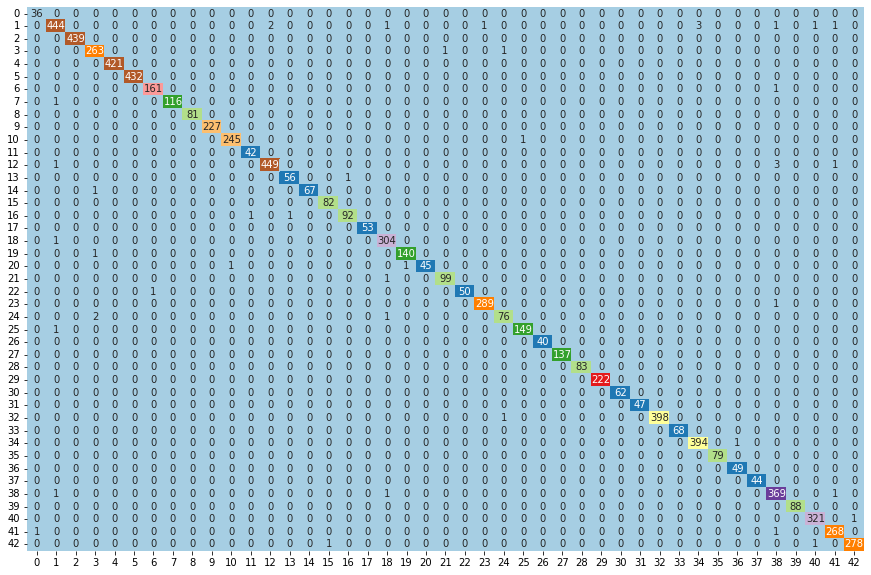

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score,confusion_matrix
import sklearn.metrics as metrics
cm3_c = metrics.confusion_matrix(y_test_arg_rs, Y_pred_rs_c90)
plt.figure(figsize=(15,10))
sns.heatmap(cm3_c, annot=True,cbar = False, cmap='Paired', fmt="d")
plt.show()

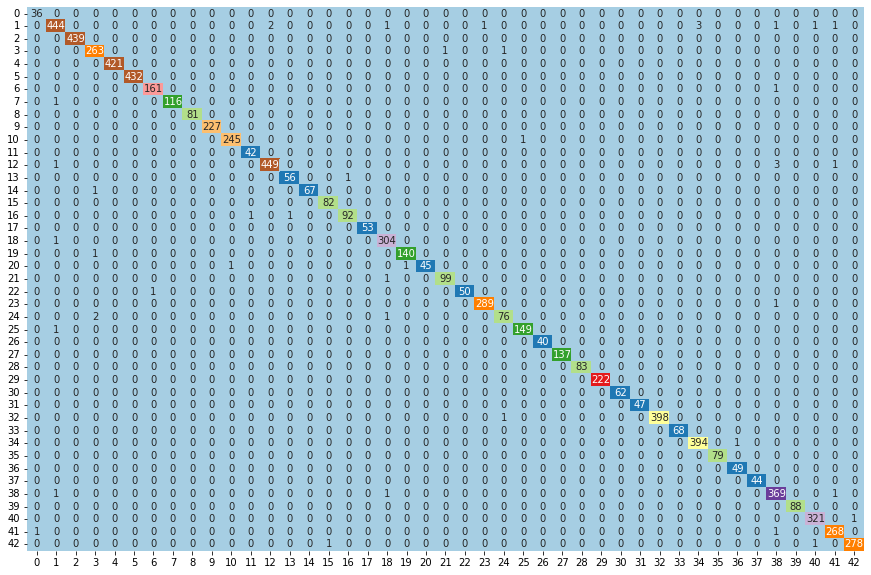

In [ ]:
cm3_ac = metrics.confusion_matrix(y_test_arg_rs, Y_pred_rs_ac90)
plt.figure(figsize=(15,10))
sns.heatmap(cm3_ac, annot=True,cbar = False, cmap='Paired', fmt="d")
plt.show()

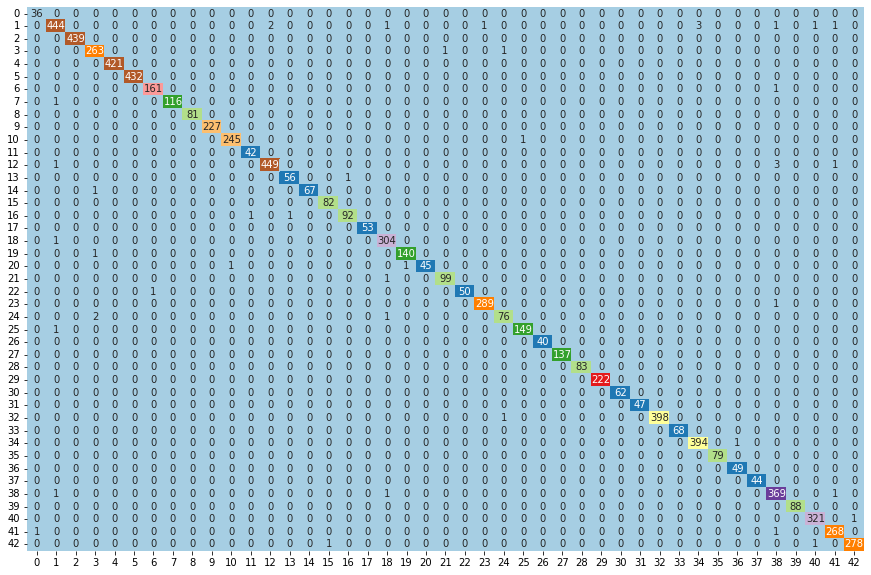

In [ ]:
cm3_wc = metrics.confusion_matrix(y_test_arg_rs, Y_pred_rs_180)
plt.figure(figsize=(15,10))
sns.heatmap(cm3_wc, annot=True,cbar = False, cmap='Paired', fmt="d")
plt.show()

In [ ]:
classwise_acc = cm3_c.diagonal()/cm3_c.sum(axis=1) * 100
imbalanced_ResNet_L50_acc3_c90 = classwise_acc.tolist()

classwise_acc = cm3_ac.diagonal()/cm3_ac.sum(axis=1) * 100
imbalanced_ResNet_L50_acc3_ac90 = classwise_acc.tolist()

classwise_acc = cm3_wc.diagonal()/cm3_wc.sum(axis=1) * 100
imbalanced_ResNet_L50_acc3_180 = classwise_acc.tolist()

In [ ]:
zipped = list(zip(imbalanced_ResNet_L50_acc3_c90,imbalanced_ResNet_L50_acc3_ac90,imbalanced_ResNet_L50_acc3_180))
df3= pd.DataFrame(zipped, columns=['clockwise_90', 'anticlockwise_90', 'rotation_180'])
df3


clockwise_90  anticlockwise_90  rotation_180
0     100.000000        100.000000    100.000000
1      97.797357         97.797357     97.797357
2     100.000000        100.000000    100.000000
3      99.245283         99.245283     99.245283
4     100.000000        100.000000    100.000000
5     100.000000        100.000000    100.000000
6      99.382716         99.382716     99.382716
7      99.145299         99.145299     99.145299
8     100.000000        100.000000    100.000000
9     100.000000        100.000000    100.000000
10     99.593496         99.593496     99.593496
11    100.000000        100.000000    100.000000
12     98.898678         98.898678     98.898678
13     98.245614         98.245614     98.245614
14     98.529412         98.529412     98.529412
15    100.000000        100.000000    100.000000
16     97.872340         97.872340     97.872340
17    100.000000        100.000000    100.000000
18     99.672131         99.672131     99.672131
19     99.290780         99.290780     99.290780
20     95.744681         95.744681     95.744681
21     99.000000         99.000000     99.000000
22     98.039216         98.039216     98.039216
23     99.655172         99.655172     99.655172
24     96.202532         96.202532     96.202532
25     99.333333         99.333333     99.333333
26    100.000000        100.000000    100.000000
27    100.000000        100.000000    100.000000
28    100.000000        100.000000    100.000000
29    100.000000        100.000000    100.000000
30    100.000000        100.000000    100.000000
31    100.000000        100.000000    100.000000
32     99.749373         99.749373     99.749373
33    100.000000        100.000000    100.000000
34     99.746835         99.746835     99.746835
35    100.000000        100.000000    100.000000
36    100.000000        100.000000    100.000000
37    100.000000        100.000000    100.000000
38     99.193548         99.193548     99.193548
39    100.000000        100.000000    100.000000
40     99.689441         99.689441     99.689441
41     99.259259         99.259259     99.259259
42     99.285714         99.285714     99.285714

In [ ]:
df3.to_csv('/content/drive/MyDrive/DBDA_PROJECT/img_rotation/imbalanced_resnet_L50.csv',encoding = 'utf-8-sig')

In [ ]:
# # accuracy: (tp + tn) / (p + n)
# accuracy = accuracy_score(y_test_arg_rs, Y_pred_rs)
# print('Accuracy: %f' % accuracy)
# # precision tp / (tp + fp)
# precision = precision_score(y_test_arg_rs, Y_pred_rs,average='weighted')
# print('Precision: %f' % precision)
# # recall: tp / (tp + fn)
# recall = recall_score(y_test_arg_rs, Y_pred_rs,average='weighted')
# print('Recall: %f' % recall)
# # f1: 2 tp / (2 tp + fp + fn)
# f1 = f1_score(y_test_arg_rs, Y_pred_rs,average='weighted')
# print('F1 score: %f' % f1)

In [ ]:
# mod="imbalanced_ResNet_L50"
# data = np.array([[mod,accuracy,precision,recall,f1]]) 
# df3 = pd.DataFrame(data, columns = ['Model','Accuracy', 'Precision','Recall', 'F1 Score'])
# df3

In [ ]:
# # saving the dataframe
# df3.to_csv('/content/drive/MyDrive/DBDA_PROJECT/Gaussian_noise/imbalanced_resnet_L50.csv',encoding = 'utf-8-sig')

In [ ]:
# # Saving the model
# model2.save("/content/drive/MyDrive/DBDA_PROJECT/Gaussian_noise/imbalanced_RESNET_L50.h5")

In [ ]:
# # saving classification report to csv
# clsf_report = pd.DataFrame(classification_report(y_true = y_test_arg_rs,  y_pred = Y_pred_rs, output_dict=True)).transpose()
# clsf_report.to_csv('/content/drive/MyDrive/DBDA_PROJECT/Gaussian_noise/imbalanced_resnet_L50.csv', index= True)

# **Handel imbalance data**

# 1- using SMOTE: Synthetic Minority Over-sampling Technique


In [ ]:
# SMOTE expected array <= 2, but we have 4 dim so reshaping it.
X1 = X.reshape(39249, 32*32*3, order ='a')

In [ ]:
X1.shape

(39249, 3072)

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
sm = SMOTE(random_state=42)

X_smote, y_smote = sm.fit_resample(X1, y)

In [ ]:
X_smote.shape, y_smote.shape

((96750, 3072), (96750, 43))

In [ ]:
X_train_S, X_test_s, y_train_S, y_test_s = train_test_split(X_smote, y_smote, test_size=0.2, random_state=0)

In [ ]:
print("Using SMOTE")
print("X_Train Shape: ",X_train_S.shape,"\nX_test shape: ",X_test_s.shape,"\ny_train shape: ",y_train_S.shape,"\ny_Test Shape : ",y_test_s.shape)

Using SMOTE
X_Train Shape:  (77400, 3072) 
X_test shape:  (19350, 3072) 
y_train shape:  (77400, 43) 
y_Test Shape :  (19350, 43)


In [ ]:
X_train_s, X_val_s, y_train_s, y_val_s = train_test_split(X_train_S, y_train_S, test_size=0.2, random_state=0)

In [ ]:
print("validation split")
print("X_Train Shape: ",X_train_s.shape,"\nX_validation shape: ",X_val_s.shape,"\ny_train shape: ",y_train_s.shape,"\ny_validation Shape : ",y_val_s.shape)

validation split
X_Train Shape:  (61920, 3072) 
X_validation shape:  (15480, 3072) 
y_train shape:  (61920, 43) 
y_validation Shape :  (15480, 43)


In [ ]:
X_val_s.shape,y_val_s.shape,X_train_s.shape, y_train_s.shape

((15480, 3072), (15480, 43), (61920, 3072), (61920, 43))

In [ ]:
# cnn expecting 4 dim, so again reshape to orignal
X_train_s = X_train_s.reshape(X_train_s.shape[0],32,32,3)
X_val_s = X_val_s.reshape(X_val_s.shape[0],32,32,3)
X_test_s = X_test_s.reshape(X_test_s.shape[0],32,32,3)

In [ ]:
X_val_s.shape,X_train_s.shape

((15480, 32, 32, 3), (61920, 32, 32, 3))

### Image Rotation

In [ ]:
# clockwise
X_test_s_c90=X_test_s
dataGen = ImageDataGenerator(rotation_range=90)  # DEGREES
dataGen.fit(X_test_s_c90)
X_test_s_c90.shape

(19350, 32, 32, 3)

In [ ]:
# anticlockwise
X_test_s_ac90=X_test_s
dataGen = ImageDataGenerator(rotation_range=-90)  # DEGREES
dataGen.fit(X_test_s_ac90)
X_test_s_ac90.shape

(19350, 32, 32, 3)

In [ ]:
# 180 rotation
X_test_s_180=X_test_s
dataGen = ImageDataGenerator(rotation_range=180)  # DEGREES
dataGen.fit(X_test_s_180)
X_test_s_180.shape

(19350, 32, 32, 3)

In [ ]:
# BUILDING A MODEL

## Model 4 - CNN Using SMOTE

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
# We have 43 classes that's why we have defined 43 in the dense
model.add(Dense(43, activation='softmax'))

In [ ]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        2432      
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 32)        25632     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 12, 12, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 64)          36928     
                                                      

In [ ]:
epochs = 25
history_sMOTE_CNN = model.fit(X_train_s, y_train_s, batch_size=64, epochs=epochs, validation_data=(X_val_s, y_val_s))

Epoch 1/25
968/968 [==============================] - 8s 8ms/step - loss: 1.5387 - accuracy: 0.6081 - val_loss: 0.1888 - val_accuracy: 0.9627
Epoch 2/25
968/968 [==============================] - 7s 7ms/step - loss: 0.3096 - accuracy: 0.9110 - val_loss: 0.0726 - val_accuracy: 0.9789
Epoch 3/25
968/968 [==============================] - 10s 11ms/step - loss: 0.2068 - accuracy: 0.9413 - val_loss: 0.0525 - val_accuracy: 0.9871
Epoch 4/25
968/968 [==============================] - 9s 10ms/step - loss: 0.1696 - accuracy: 0.9522 - val_loss: 0.0489 - val_accuracy: 0.9873
Epoch 5/25
968/968 [==============================] - 7s 7ms/step - loss: 0.1511 - accuracy: 0.9572 - val_loss: 0.0431 - val_accuracy: 0.9891
Epoch 6/25
968/968 [==============================] - 7s 7ms/step - loss: 0.1448 - accuracy: 0.9606 - val_loss: 0.0377 - val_accuracy: 0.9889
Epoch 7/25
968/968 [==============================] - 6s 6ms/step - loss: 0.1369 - accuracy: 0.9635 - val_loss: 0.0481 - val_accuracy: 0.9869
Epo

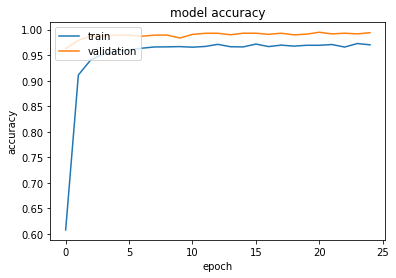

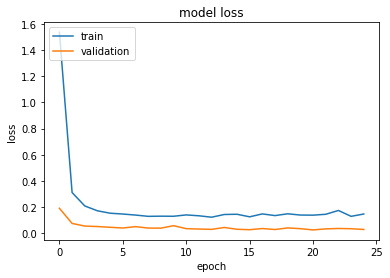

In [ ]:
# summarize history for accuracy
plt.plot(history_sMOTE_CNN.history['accuracy'])
plt.plot(history_sMOTE_CNN.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_sMOTE_CNN.history['loss'])
plt.plot(history_sMOTE_CNN.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [ ]:
Y_pred_scnn_c90 = np.argmax(model.predict(X_test_s_c90), axis=1)
Y_pred_scnn_c90
y_test_arg_scnn=np.argmax(y_test_s,axis=1)

In [ ]:
Y_pred_scnn_ac90 = np.argmax(model.predict(X_test_s_ac90), axis=1)
Y_pred_scnn_ac90
y_test_arg_scnn=np.argmax(y_test_s,axis=1)

In [ ]:
Y_pred_scnn_180 = np.argmax(model.predict(X_test_s_180), axis=1)
Y_pred_scnn_180
y_test_arg_scnn=np.argmax(y_test_s,axis=1)

In [ ]:
# print(classification_report(y_test_arg_scnn, Y_pred_scnn))

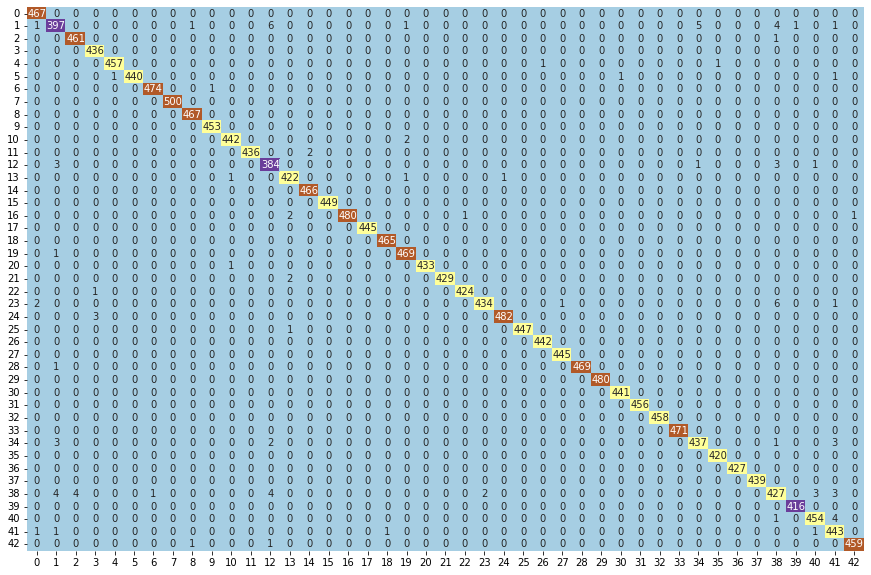

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score,confusion_matrix
import sklearn.metrics as metrics
cm4_c = metrics.confusion_matrix(y_test_arg_scnn, Y_pred_scnn_c90)
plt.figure(figsize=(15,10))
sns.heatmap(cm4_c, annot=True,cbar = False, cmap='Paired', fmt="d")
plt.show()

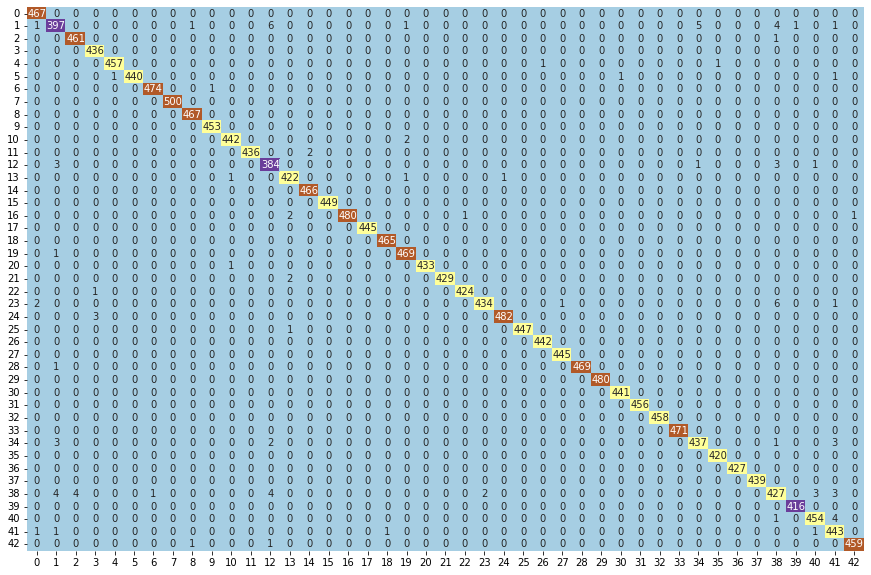

In [ ]:
cm4_ac = metrics.confusion_matrix(y_test_arg_scnn, Y_pred_scnn_ac90)
plt.figure(figsize=(15,10))
sns.heatmap(cm4_ac, annot=True,cbar = False, cmap='Paired', fmt="d")
plt.show()

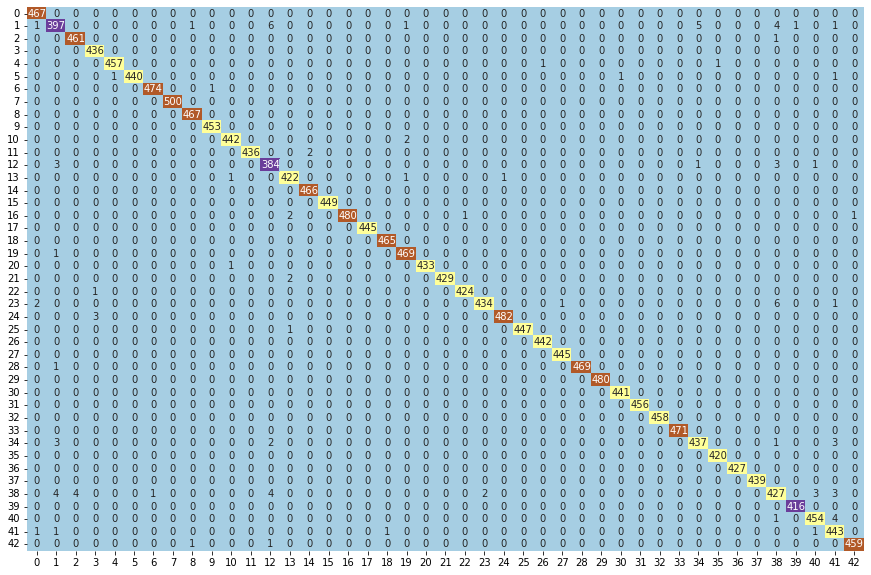

In [ ]:
cm4_wc = metrics.confusion_matrix(y_test_arg_scnn, Y_pred_scnn_180)
plt.figure(figsize=(15,10))
sns.heatmap(cm4_wc, annot=True,cbar = False, cmap='Paired', fmt="d")
plt.show()

In [ ]:
# clockwise
classwise_acc = cm4_c.diagonal()/cm4_c.sum(axis=1) * 100
balanced_SMOTE_CNN_acc4_c90 = classwise_acc.tolist()

In [ ]:
# clockwise
classwise_acc = cm4_ac.diagonal()/cm4_ac.sum(axis=1) * 100
balanced_SMOTE_CNN_acc4_ac90= classwise_acc.tolist()

In [ ]:
# clockwise
classwise_acc = cm4_wc.diagonal()/cm4_wc.sum(axis=1) * 100
balanced_SMOTE_CNN_acc4_180 = classwise_acc.tolist()

In [ ]:
zipped = list(zip(balanced_SMOTE_CNN_acc4_c90,balanced_SMOTE_CNN_acc4_ac90,balanced_SMOTE_CNN_acc4_180))
df4= pd.DataFrame(zipped, columns=['clockwise_90', 'anticlockwise_90', 'rotation_180'])
df4

clockwise_90  anticlockwise_90  rotation_180
0     100.000000        100.000000    100.000000
1      95.203837         95.203837     95.203837
2      99.783550         99.783550     99.783550
3     100.000000        100.000000    100.000000
4      99.564270         99.564270     99.564270
5      99.322799         99.322799     99.322799
6      99.789474         99.789474     99.789474
7     100.000000        100.000000    100.000000
8     100.000000        100.000000    100.000000
9     100.000000        100.000000    100.000000
10     99.549550         99.549550     99.549550
11     99.543379         99.543379     99.543379
12     97.959184         97.959184     97.959184
13     99.294118         99.294118     99.294118
14    100.000000        100.000000    100.000000
15    100.000000        100.000000    100.000000
16     99.173554         99.173554     99.173554
17    100.000000        100.000000    100.000000
18    100.000000        100.000000    100.000000
19     99.787234         99.787234     99.787234
20     99.769585         99.769585     99.769585
21     99.535963         99.535963     99.535963
22     99.764706         99.764706     99.764706
23     97.747748         97.747748     97.747748
24     99.381443         99.381443     99.381443
25     99.776786         99.776786     99.776786
26    100.000000        100.000000    100.000000
27    100.000000        100.000000    100.000000
28     99.787234         99.787234     99.787234
29    100.000000        100.000000    100.000000
30    100.000000        100.000000    100.000000
31    100.000000        100.000000    100.000000
32    100.000000        100.000000    100.000000
33    100.000000        100.000000    100.000000
34     97.982063         97.982063     97.982063
35    100.000000        100.000000    100.000000
36    100.000000        100.000000    100.000000
37    100.000000        100.000000    100.000000
38     95.312500         95.312500     95.312500
39    100.000000        100.000000    100.000000
40     98.910675         98.910675     98.910675
41     99.105145         99.105145     99.105145
42     99.566161         99.566161     99.566161

In [ ]:
df4.to_csv('/content/drive/MyDrive/DBDA_PROJECT/img_rotation/balanced_SMOTE_CNN.csv',encoding = 'utf-8-sig')


In [ ]:
# # accuracy: (tp + tn) / (p + n)
# accuracy = accuracy_score(y_test_arg_scnn, Y_pred_scnn)
# print('Accuracy: %f' % accuracy)
# # precision tp / (tp + fp)
# precision = precision_score(y_test_arg_scnn, Y_pred_scnn,average='weighted')
# print('Precision: %f' % precision)
# # recall: tp / (tp + fn)
# recall = recall_score(y_test_arg_scnn, Y_pred_scnn,average='weighted')
# print('Recall: %f' % recall)
# # f1: 2 tp / (2 tp + fp + fn)
# f1 = f1_score(y_test_arg_scnn, Y_pred_scnn,average='weighted')
# print('F1 score: %f' % f1)

Accuracy: 0.992713
Precision: 0.992902
Recall: 0.992713
F1 score: 0.992733


In [ ]:
# mod="balanced_SMOTE_CNN"
# data = np.array([[mod,accuracy,precision,recall,f1]]) 
# df4 = pd.DataFrame(data, columns = ['Model','Accuracy', 'Precision','Recall', 'F1 Score'])
# df4

In [ ]:
# # saving the dataframe
# df4.to_csv('/content/drive/MyDrive/DBDA_PROJECT/Gaussian_noise/balanced_SMOTE_CNN.csv',encoding = 'utf-8-sig')

In [ ]:
# # Saving the model
# model.save("/content/drive/MyDrive/DBDA_PROJECT/Gaussian_noise/balanced_SMOTE_CNN.h5")

In [ ]:
#  

## Model 5 - ResNet50 152 layer using SMOTE

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [ ]:
resnet_preTrained = tf.keras.applications.ResNet50V2(
    include_top=False,
    weights=None,
    input_shape=(32,32, 3),
)

In [ ]:
#taking 152th layer of resnet50V2 as an output layer
x = resnet_preTrained.layers[152].output
x = Flatten()(x)                                       #flattening
x = Dropout(0.1)(x)                                    #dropout
output = Dense(43, activation= 'softmax')(x)
model5 = Model(inputs = resnet_preTrained.input, outputs = output)
model5.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 pool1_pad (ZeroPadding2D)      (None, 18, 18, 64)   0           ['conv1_conv[0][0]']             
                                                                                            

In [ ]:
#optimizer
optim = tf.keras.optimizers.Adam(
    learning_rate=0.001,epsilon=1e-07, amsgrad=False,
    name='Adam'
)

In [ ]:
#compiling the model
model5.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
#training the model
n_epochs = 25
history5 =  model5.fit(X_train_s, y_train_s,  batch_size = 256, validation_data = (X_val_s, y_val_s), epochs = n_epochs, verbose = 1)


Epoch 1/25
242/242 [==============================] - 23s 80ms/step - loss: 0.8023 - accuracy: 0.7638 - val_loss: 0.5429 - val_accuracy: 0.8238
Epoch 2/25
242/242 [==============================] - 16s 68ms/step - loss: 0.1351 - accuracy: 0.9569 - val_loss: 0.4178 - val_accuracy: 0.8901
Epoch 3/25
242/242 [==============================] - 16s 68ms/step - loss: 0.0713 - accuracy: 0.9769 - val_loss: 0.2033 - val_accuracy: 0.9436
Epoch 4/25
242/242 [==============================] - 17s 69ms/step - loss: 0.0548 - accuracy: 0.9823 - val_loss: 0.4031 - val_accuracy: 0.8940
Epoch 5/25
242/242 [==============================] - 17s 69ms/step - loss: 0.0462 - accuracy: 0.9850 - val_loss: 0.1673 - val_accuracy: 0.9548
Epoch 6/25
242/242 [==============================] - 17s 69ms/step - loss: 0.0361 - accuracy: 0.9888 - val_loss: 0.2132 - val_accuracy: 0.9401
Epoch 7/25
242/242 [==============================] - 17s 70ms/step - loss: 0.0292 - accuracy: 0.9910 - val_loss: 0.0667 - val_accuracy:

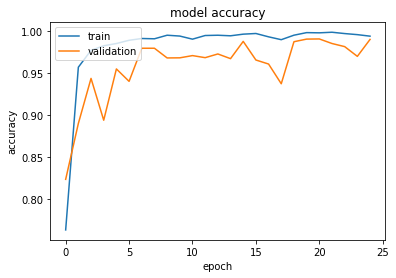

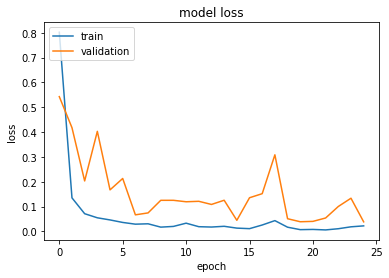

In [ ]:
# summarize history for accuracy
plt.plot(history5.history['accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
# clock wise
Y_pred_SM_rn_c90 = np.argmax(model5.predict(X_test_s_c90), axis=1)
Y_pred_SM_rn_c90
y_test_arg_SM_rn=np.argmax(y_test_s,axis=1)

In [ ]:
# anti-clock wise
Y_pred_SM_rn_ac90 = np.argmax(model5.predict(X_test_s_ac90), axis=1)
Y_pred_SM_rn_ac90
y_test_arg_SM_rn=np.argmax(y_test_s,axis=1)

In [ ]:
# 180 rotation
Y_pred_SM_rn_180 = np.argmax(model5.predict(X_test_s_180), axis=1)
Y_pred_SM_rn_180
y_test_arg_SM_rn=np.argmax(y_test_s,axis=1)

In [ ]:
# print(classification_report(y_test_arg_SM_rn, Y_pred_SM_rn))

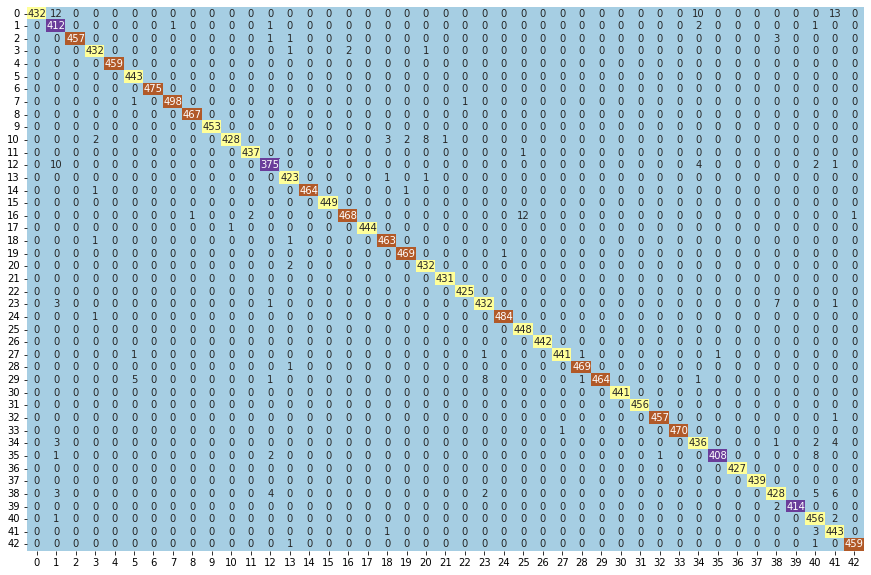

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score,confusion_matrix
import sklearn.metrics as metrics
cm5_c = metrics.confusion_matrix(y_test_arg_SM_rn, Y_pred_SM_rn_c90)
plt.figure(figsize=(15,10))
sns.heatmap(cm5_c, annot=True,cbar = False, cmap='Paired', fmt="d")
plt.show()

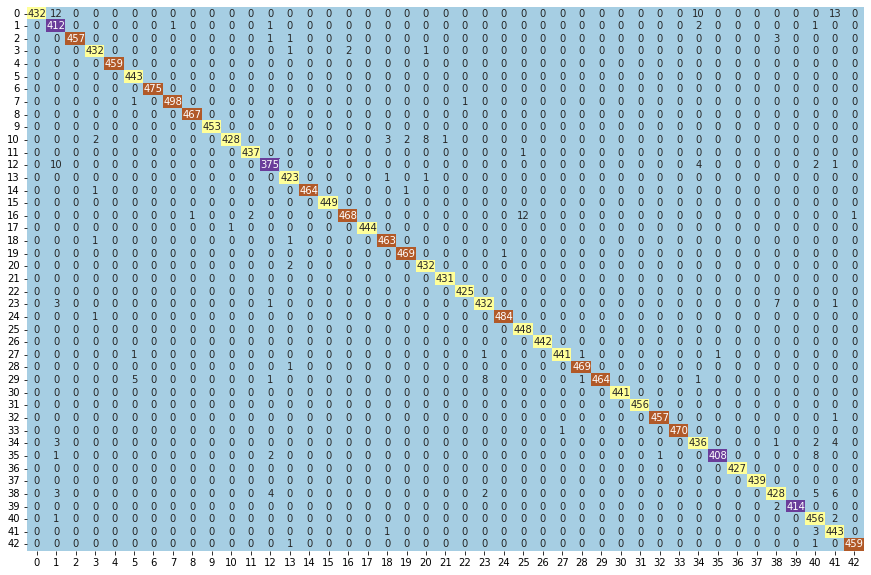

In [ ]:
cm5_ac= metrics.confusion_matrix(y_test_arg_SM_rn, Y_pred_SM_rn_ac90)
plt.figure(figsize=(15,10))
sns.heatmap(cm5_ac, annot=True,cbar = False, cmap='Paired', fmt="d")
plt.show()

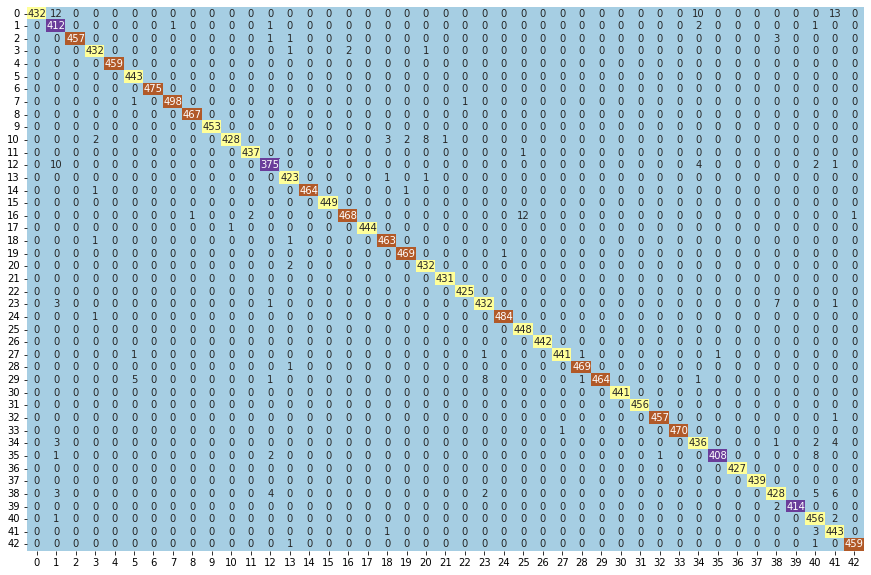

In [ ]:
cm5_wc = metrics.confusion_matrix(y_test_arg_SM_rn, Y_pred_SM_rn_180)
plt.figure(figsize=(15,10))
sns.heatmap(cm5_wc, annot=True,cbar = False, cmap='Paired', fmt="d")
plt.show()

In [ ]:
classwise_acc = cm5_c.diagonal()/cm5_c.sum(axis=1) * 100
balanced_SMOTE_ResNet_152_acc5_c90 = classwise_acc.tolist()

classwise_acc = cm5_ac.diagonal()/cm5_ac.sum(axis=1) * 100
balanced_SMOTE_ResNet_152_acc5_ac90 = classwise_acc.tolist()

classwise_acc = cm5_wc.diagonal()/cm5_wc.sum(axis=1) * 100
balanced_SMOTE_ResNet_152_acc5_180 = classwise_acc.tolist()

In [ ]:
zipped = list(zip(balanced_SMOTE_ResNet_152_acc5_c90,balanced_SMOTE_ResNet_152_acc5_ac90,balanced_SMOTE_ResNet_152_acc5_180))
df5= pd.DataFrame(zipped, columns=['clockwise_90', 'anticlockwise_90', 'rotation_180'])
df5

clockwise_90  anticlockwise_90  rotation_180
0      92.505353         92.505353     92.505353
1      98.800959         98.800959     98.800959
2      98.917749         98.917749     98.917749
3      99.082569         99.082569     99.082569
4     100.000000        100.000000    100.000000
5     100.000000        100.000000    100.000000
6     100.000000        100.000000    100.000000
7      99.600000         99.600000     99.600000
8     100.000000        100.000000    100.000000
9     100.000000        100.000000    100.000000
10     96.396396         96.396396     96.396396
11     99.771689         99.771689     99.771689
12     95.663265         95.663265     95.663265
13     99.529412         99.529412     99.529412
14     99.570815         99.570815     99.570815
15    100.000000        100.000000    100.000000
16     96.694215         96.694215     96.694215
17     99.775281         99.775281     99.775281
18     99.569892         99.569892     99.569892
19     99.787234         99.787234     99.787234
20     99.539171         99.539171     99.539171
21    100.000000        100.000000    100.000000
22    100.000000        100.000000    100.000000
23     97.297297         97.297297     97.297297
24     99.793814         99.793814     99.793814
25    100.000000        100.000000    100.000000
26    100.000000        100.000000    100.000000
27     99.101124         99.101124     99.101124
28     99.787234         99.787234     99.787234
29     96.666667         96.666667     96.666667
30    100.000000        100.000000    100.000000
31    100.000000        100.000000    100.000000
32     99.781659         99.781659     99.781659
33     99.787686         99.787686     99.787686
34     97.757848         97.757848     97.757848
35     97.142857         97.142857     97.142857
36    100.000000        100.000000    100.000000
37    100.000000        100.000000    100.000000
38     95.535714         95.535714     95.535714
39     99.519231         99.519231     99.519231
40     99.346405         99.346405     99.346405
41     99.105145         99.105145     99.105145
42     99.566161         99.566161     99.566161

In [ ]:
df5.to_csv('/content/drive/MyDrive/DBDA_PROJECT/img_rotation/balanced_SMOTE_ResNet_152.csv',encoding = 'utf-8-sig')

In [ ]:
# # accuracy: (tp + tn) / (p + n)
# accuracy = accuracy_score(y_test_arg_SM_rn, Y_pred_SM_rn)
# print('Accuracy: %f' % accuracy)
# # precision tp / (tp + fp)
# precision = precision_score(y_test_arg_SM_rn, Y_pred_SM_rn,average='weighted')
# print('Precision: %f' % precision)
# # recall: tp / (tp + fn)
# recall = recall_score(y_test_arg_SM_rn, Y_pred_SM_rn,average='weighted')
# print('Recall: %f' % recall)
# # f1: 2 tp / (2 tp + fp + fn)
# f1 = f1_score(y_test_arg_SM_rn, Y_pred_SM_rn,average='weighted')
# print('F1 score: %f' % f1)

In [ ]:
# mod="balanced_SMOTE_ResNet_152"
# data = np.array([[mod,accuracy,precision,recall,f1]]) 
# df5 = pd.DataFrame(data, columns = ['Model','Accuracy', 'Precision','Recall', 'F1 Score'])
# df5

In [ ]:
# # saving the dataframe
# df5.to_csv('/content/drive/MyDrive/DBDA_PROJECT/Gaussian_noise/balanced_SMOTE_ResNet_152.csv',encoding = 'utf-8-sig')

In [ ]:
# # Saving the model
# model5.save("/content/drive/MyDrive/DBDA_PROJECT/Gaussian_noise/balanced_SMOTE_ResNet_152.h5")


In [ ]:
# # saving classification report to csv
# clsf_report = pd.DataFrame(classification_report(y_true =y_test_arg_SM_rn,  y_pred =  Y_pred_SM_rn, output_dict=True)).transpose()
# clsf_report.to_csv('/content/drive/MyDrive/DBDA_PROJECT/Gaussian_noise/balanced_SMOTE_ResNet_152.csv', index= True)

In [ ]:
# ResNet with 50 layer 

## Model 6- ResNet50 50 Layer using SMOTE

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [ ]:
resnet_preTrained = tf.keras.applications.ResNet50V2(
    include_top=False,
    weights='imagenet',
    input_shape=(32,32, 3),
)


In [ ]:

#taking 50th layer of resnet50V2 as an output layer
x = resnet_preTrained.layers[50].output
x = Flatten()(x)                                       #flattening
x = Dropout(0.1)(x)                                    #dropout
output = Dense(43, activation= 'softmax')(x)
model6 = Model(inputs = resnet_preTrained.input, outputs = output)
model6.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 pool1_pad (ZeroPadding2D)      (None, 18, 18, 64)   0           ['conv1_conv[0][0]']             
                                                                                            

In [ ]:
#optimizer
optim = tf.keras.optimizers.Adam(
    learning_rate=0.001,epsilon=1e-07, amsgrad=False,
    name='Adam'
)

In [ ]:
#compiling the model
model6.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
#training the model
n_epochs = 25
history6 =  model6.fit(X_train_s, y_train_s,  batch_size = 256, validation_data = (X_val_s, y_val_s), epochs = n_epochs, verbose = 1)


Epoch 1/25
242/242 [==============================] - 8s 29ms/step - loss: 0.2752 - accuracy: 0.9266 - val_loss: 0.1440 - val_accuracy: 0.9532
Epoch 2/25
242/242 [==============================] - 8s 34ms/step - loss: 0.0242 - accuracy: 0.9927 - val_loss: 0.0999 - val_accuracy: 0.9669
Epoch 3/25
242/242 [==============================] - 9s 36ms/step - loss: 0.0152 - accuracy: 0.9953 - val_loss: 0.1996 - val_accuracy: 0.9499
Epoch 4/25
242/242 [==============================] - 7s 27ms/step - loss: 0.0231 - accuracy: 0.9928 - val_loss: 0.1733 - val_accuracy: 0.9593
Epoch 5/25
242/242 [==============================] - 7s 27ms/step - loss: 0.0144 - accuracy: 0.9957 - val_loss: 0.2324 - val_accuracy: 0.9462
Epoch 6/25
242/242 [==============================] - 7s 27ms/step - loss: 0.0112 - accuracy: 0.9965 - val_loss: 0.1766 - val_accuracy: 0.9588
Epoch 7/25
242/242 [==============================] - 7s 27ms/step - loss: 0.0232 - accuracy: 0.9937 - val_loss: 0.0649 - val_accuracy: 0.9822

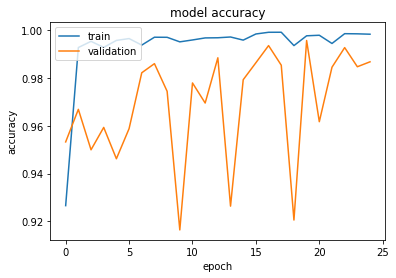

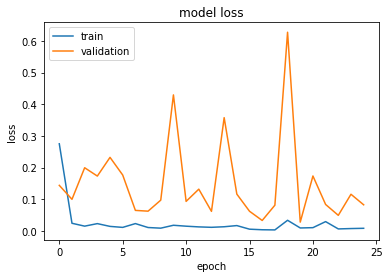

In [ ]:
# summarize history for accuracy
plt.plot(history6.history['accuracy'])
plt.plot(history6.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history6.history['loss'])
plt.plot(history6.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
# clockwise
Y_pred_SMT_rn_c90 = np.argmax(model6.predict(X_test_s_c90), axis=1)
Y_pred_SMT_rn_c90
y_test_arg_SMT_rn=np.argmax(y_test_s,axis=1)

In [ ]:
# anticlockwise
Y_pred_SMT_rn_ac90 = np.argmax(model6.predict(X_test_s_ac90), axis=1)
Y_pred_SMT_rn_ac90
y_test_arg_SMT_rn=np.argmax(y_test_s,axis=1)

In [ ]:
# 180
Y_pred_SMT_rn_180 = np.argmax(model6.predict(X_test_s_180), axis=1)
Y_pred_SMT_rn_180
y_test_arg_SMT_rn=np.argmax(y_test_s,axis=1)


In [ ]:
# print(classification_report(y_test_arg_SMT_rn, Y_pred_SMT_rn))

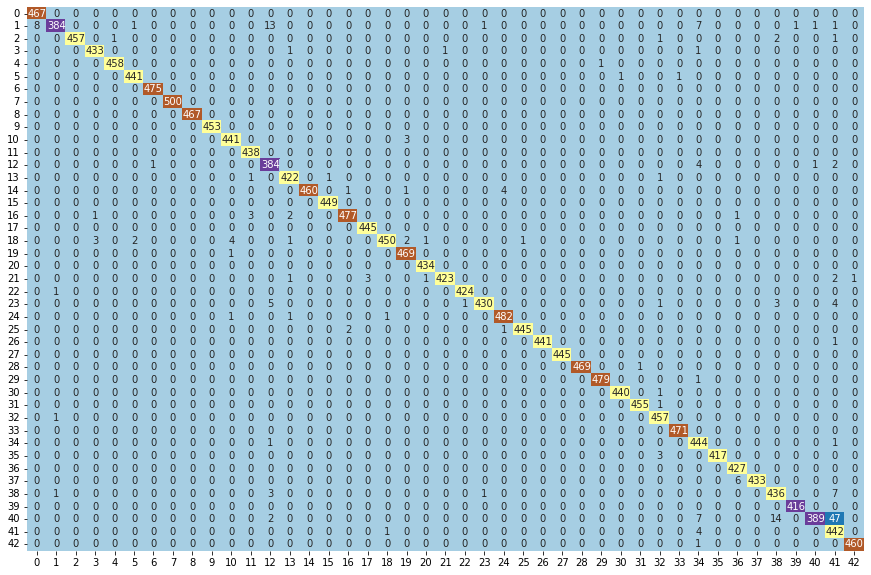

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score,confusion_matrix
import sklearn.metrics as metrics
cm6_c = metrics.confusion_matrix(y_test_arg_SMT_rn, Y_pred_SMT_rn_c90)
plt.figure(figsize=(15,10))
sns.heatmap(cm6_c, annot=True,cbar = False, cmap='Paired', fmt="d")
plt.show()

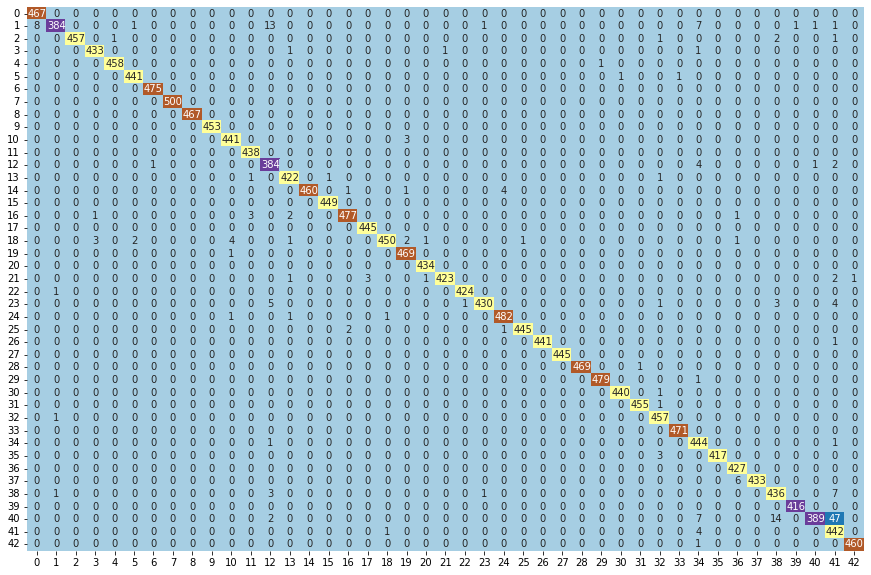

In [ ]:
cm6_ac = metrics.confusion_matrix(y_test_arg_SMT_rn, Y_pred_SMT_rn_ac90)
plt.figure(figsize=(15,10))
sns.heatmap(cm6_ac, annot=True,cbar = False, cmap='Paired', fmt="d")
plt.show()

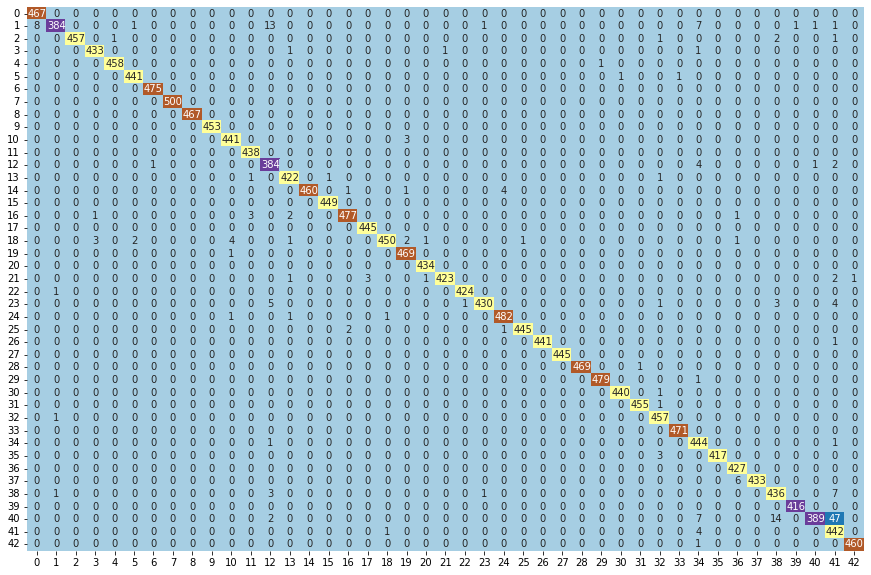

In [ ]:
cm6_wc = metrics.confusion_matrix(y_test_arg_SMT_rn, Y_pred_SMT_rn_180)
plt.figure(figsize=(15,10))
sns.heatmap(cm6_wc, annot=True,cbar = False, cmap='Paired', fmt="d")
plt.show()

In [ ]:
classwise_acc = cm6_c.diagonal()/cm6_c.sum(axis=1) * 100
balanced_SMOTE_ResNet_50_acc6_c90 = classwise_acc.tolist()

classwise_acc = cm6_ac.diagonal()/cm6_ac.sum(axis=1) * 100
balanced_SMOTE_ResNet_50_acc6_ac90 = classwise_acc.tolist()

classwise_acc = cm6_ac.diagonal()/cm6_wc.sum(axis=1) * 100
balanced_SMOTE_ResNet_50_acc6_180 = classwise_acc.tolist()

In [ ]:
zipped = list(zip(balanced_SMOTE_ResNet_50_acc6_c90,balanced_SMOTE_ResNet_50_acc6_ac90,balanced_SMOTE_ResNet_50_acc6_180))
df6= pd.DataFrame(zipped, columns=['clockwise_90', 'anticlockwise_90', 'rotation_180'])
df6

clockwise_90  anticlockwise_90  rotation_180
0     100.000000        100.000000    100.000000
1      92.086331         92.086331     92.086331
2      98.917749         98.917749     98.917749
3      99.311927         99.311927     99.311927
4      99.782135         99.782135     99.782135
5      99.548533         99.548533     99.548533
6     100.000000        100.000000    100.000000
7     100.000000        100.000000    100.000000
8     100.000000        100.000000    100.000000
9     100.000000        100.000000    100.000000
10     99.324324         99.324324     99.324324
11    100.000000        100.000000    100.000000
12     97.959184         97.959184     97.959184
13     99.294118         99.294118     99.294118
14     98.712446         98.712446     98.712446
15    100.000000        100.000000    100.000000
16     98.553719         98.553719     98.553719
17    100.000000        100.000000    100.000000
18     96.774194         96.774194     96.774194
19     99.787234         99.787234     99.787234
20    100.000000        100.000000    100.000000
21     98.143852         98.143852     98.143852
22     99.764706         99.764706     99.764706
23     96.846847         96.846847     96.846847
24     99.381443         99.381443     99.381443
25     99.330357         99.330357     99.330357
26     99.773756         99.773756     99.773756
27    100.000000        100.000000    100.000000
28     99.787234         99.787234     99.787234
29     99.791667         99.791667     99.791667
30     99.773243         99.773243     99.773243
31     99.780702         99.780702     99.780702
32     99.781659         99.781659     99.781659
33    100.000000        100.000000    100.000000
34     99.551570         99.551570     99.551570
35     99.285714         99.285714     99.285714
36    100.000000        100.000000    100.000000
37     98.633257         98.633257     98.633257
38     97.321429         97.321429     97.321429
39    100.000000        100.000000    100.000000
40     84.749455         84.749455     84.749455
41     98.881432         98.881432     98.881432
42     99.783080         99.783080     99.783080

In [ ]:
df6.to_csv('/content/drive/MyDrive/DBDA_PROJECT/img_rotation/balanced_SMOTE_ResNet_50.csv',encoding = 'utf-8-sig')


In [ ]:
# # accuracy: (tp + tn) / (p + n)
# accuracy = accuracy_score(y_test_arg_SMT_rn, Y_pred_SMT_rn)
# print('Accuracy: %f' % accuracy)
# # precision tp / (tp + fp)
# precision = precision_score(y_test_arg_SMT_rn, Y_pred_SMT_rn,average='weighted')
# print('Precision: %f' % precision)
# # recall: tp / (tp + fn)
# recall = recall_score(y_test_arg_SMT_rn, Y_pred_SMT_rn,average='weighted')
# print('Recall: %f' % recall)
# # f1: 2 tp / (2 tp + fp + fn)
# f1 = f1_score(y_test_arg_SMT_rn, Y_pred_SMT_rn,average='weighted')
# print('F1 score: %f' % f1)


In [ ]:
# mod="balanced_SMOTE_ResNet_50"
# data = np.array([[mod,accuracy,precision,recall,f1]]) 
# df6 = pd.DataFrame(data, columns = ['Model','Accuracy', 'Precision','Recall', 'F1 Score'])
# df6

In [ ]:
# # saving the dataframe
# df6.to_csv('/content/drive/MyDrive/DBDA_PROJECT/Gaussian_noise/balanced_SMOTE_ResNet_50.csv',encoding = 'utf-8-sig')


In [ ]:
# # Saving the model
# model6.save("/content/drive/MyDrive/DBDA_PROJECT/Gaussian_noise/balanced_SMOTE_ResNet_50.h5")


In [ ]:
# # saving classification report to csv
# clsf_report = pd.DataFrame(classification_report(y_true =y_test_arg_SMT_rn,  y_pred =   Y_pred_SMT_rn, output_dict=True)).transpose()
# clsf_report.to_csv('/content/drive/MyDrive/DBDA_PROJECT/Gaussian_noise/balanced_SMOTE_ResNet_50.csv', index= True)

# **Handeling imbalanced data**

### 2) Weighted class approch

In [ ]:
# dataset prepration

In [ ]:
# X_train, X_val, y_train, y_val = imbalanced dataset

In [ ]:
from sklearn.utils import class_weight


In [ ]:
cls_wt = class_weight.compute_class_weight('balanced', 
                                           classes=np.unique(np.argmax(y_train, axis=1)), 
                                           y=np.argmax(y_train, axis=1))



In [ ]:
class_weight_dict = dict(enumerate(cls_wt))

In [ ]:
class_weight_dict


{0: 4.233063700707786,
 1: 0.4217781882293678,
 2: 0.46958423689523665,
 3: 0.7029636470489463,
 4: 0.4333551859775033,
 5: 0.42330637007077854,
 6: 1.1801268498942918,
 7: 1.4178708512079476,
 8: 2.2554547903385114,
 9: 0.8453875408070541,
 10: 0.7518182634461704,
 11: 4.263961975895434,
 12: 0.409651325874947,
 13: 2.318106312292359,
 14: 2.6919944271782232,
 15: 2.3554951237809454,
 16: 1.7489903913104023,
 17: 3.540380549682875,
 18: 0.6016094651881302,
 19: 1.5495034236012584,
 20: 3.7207821063546143,
 21: 1.6834662556128945,
 22: 3.416156670746634,
 23: 0.6469133894769373,
 24: 1.8843960990247561,
 25: 1.1409429505813953,
 26: 3.3766635300443606,
 27: 1.3246321784527764,
 28: 2.131980987947717,
 29: 0.7403837651428066,
 30: 2.2296289721285283,
 31: 4.425475687103594,
 32: 0.4327131782945736,
 33: 3.227418733136323,
 34: 0.45960880464018444,
 35: 2.5734043643069358,
 36: 3.628340314892388,
 37: 3.894418604651163,
 38: 0.4946340310733907,
 39: 2.1961007169085502,
 40: 0.64691338947

In [ ]:
X_test_c90=X_test
dataGen = ImageDataGenerator(rotation_range=90)  # DEGREES
dataGen.fit(X_test_c90)
X_test_c90.shape

(7850, 32, 32, 3)

In [ ]:
X_test_ac90=X_test
dataGen = ImageDataGenerator(rotation_range=-90)  # DEGREES
dataGen.fit(X_test_ac90)
X_test_ac90.shape

(7850, 32, 32, 3)

In [ ]:
X_test_c180=X_test
dataGen = ImageDataGenerator(rotation_range=180)  # DEGREES
dataGen.fit(X_test_c180)
X_test_c180.shape

(7850, 32, 32, 3)

## Model 7- CNN with weight-class approch

In [ ]:
model7 = Sequential()
model7.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model7.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model7.add(MaxPool2D(pool_size=(2, 2)))
model7.add(Dropout(rate=0.25))
model7.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model7.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model7.add(MaxPool2D(pool_size=(2, 2)))
model7.add(Dropout(rate=0.25))
model7.add(Flatten())
model7.add(Dense(256, activation='relu'))
model7.add(Dropout(rate=0.5))
# We have 43 classes that's why we have defined 43 in the dense
model7.add(Dense(43, activation='softmax'))


In [ ]:
#Compilation of the model
model7.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
model7.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 32)        2432      
                                                                 
 conv2d_9 (Conv2D)           (None, 24, 24, 32)        25632     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 12, 12, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 10, 10, 64)        18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 8, 8, 64)          36928     
                                                      

In [ ]:
epochs = 25
history7 = model7.fit(X_train, y_train,class_weight=class_weight_dict, batch_size=64, epochs=epochs, validation_data=(X_val, y_val))


Epoch 1/25
393/393 [==============================] - 4s 7ms/step - loss: 3.5496 - accuracy: 0.1584 - val_loss: 1.8356 - val_accuracy: 0.4621
Epoch 2/25
393/393 [==============================] - 3s 7ms/step - loss: 1.7360 - accuracy: 0.4694 - val_loss: 0.8856 - val_accuracy: 0.7514
Epoch 3/25
393/393 [==============================] - 3s 8ms/step - loss: 0.9939 - accuracy: 0.6692 - val_loss: 0.5621 - val_accuracy: 0.8604
Epoch 4/25
393/393 [==============================] - 3s 7ms/step - loss: 0.7223 - accuracy: 0.7509 - val_loss: 0.3937 - val_accuracy: 0.8928
Epoch 5/25
393/393 [==============================] - 3s 7ms/step - loss: 0.5803 - accuracy: 0.8005 - val_loss: 0.3291 - val_accuracy: 0.9086
Epoch 6/25
393/393 [==============================] - 3s 7ms/step - loss: 0.4860 - accuracy: 0.8292 - val_loss: 0.3253 - val_accuracy: 0.9127
Epoch 7/25
393/393 [==============================] - 3s 7ms/step - loss: 0.4175 - accuracy: 0.8529 - val_loss: 0.2038 - val_accuracy: 0.9403
Epoch 

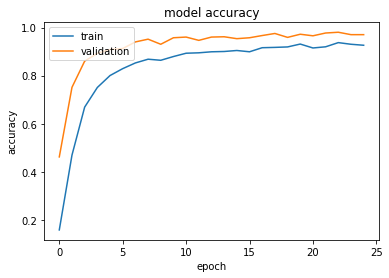

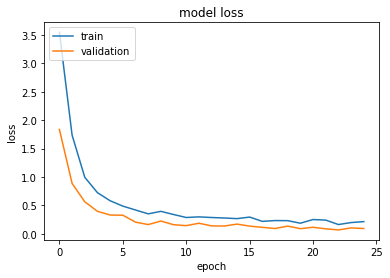

In [ ]:
# summarize history for accuracy
plt.plot(history7.history['accuracy'])
plt.plot(history7.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history7.history['loss'])
plt.plot(history7.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [ ]:
# classwise
Y_pred_wt_cnn_c90 = np.argmax(model7.predict(X_test_c90), axis=1)
Y_pred_wt_cnn_c90
y_test_arg_wt_cnn=np.argmax(y_test,axis=1)
print(accuracy_score(y_test_arg_wt_cnn, Y_pred_wt_cnn_c90))

0.9684076433121019


In [ ]:
# anticlockwise
Y_pred_wt_cnn_ac90 = np.argmax(model7.predict(X_test_ac90), axis=1)
Y_pred_wt_cnn_ac90
y_test_arg_wt_cnn=np.argmax(y_test,axis=1)
print(accuracy_score(y_test_arg_wt_cnn, Y_pred_wt_cnn_ac90))

0.9684076433121019


In [ ]:
# 180
Y_pred_wt_cnn_180 = np.argmax(model7.predict(X_test_c180), axis=1)
Y_pred_wt_cnn_180
y_test_arg_wt_cnn=np.argmax(y_test,axis=1)
print(accuracy_score(y_test_arg_wt_cnn, Y_pred_wt_cnn_180))

0.9684076433121019


In [ ]:
# print(classification_report(y_test_arg_wt_cnn, Y_pred_wt_cnn))

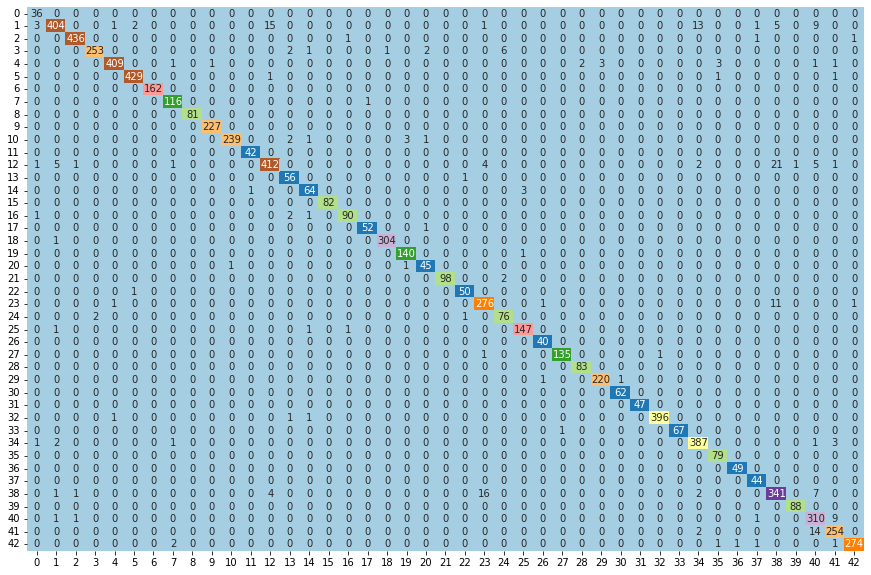

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score,confusion_matrix
import sklearn.metrics as metrics
cm7_c = metrics.confusion_matrix(y_test_arg_wt_cnn, Y_pred_wt_cnn_c90)
plt.figure(figsize=(15,10))
sns.heatmap(cm7_c, annot=True,cbar = False, cmap='Paired', fmt="d")
plt.show()

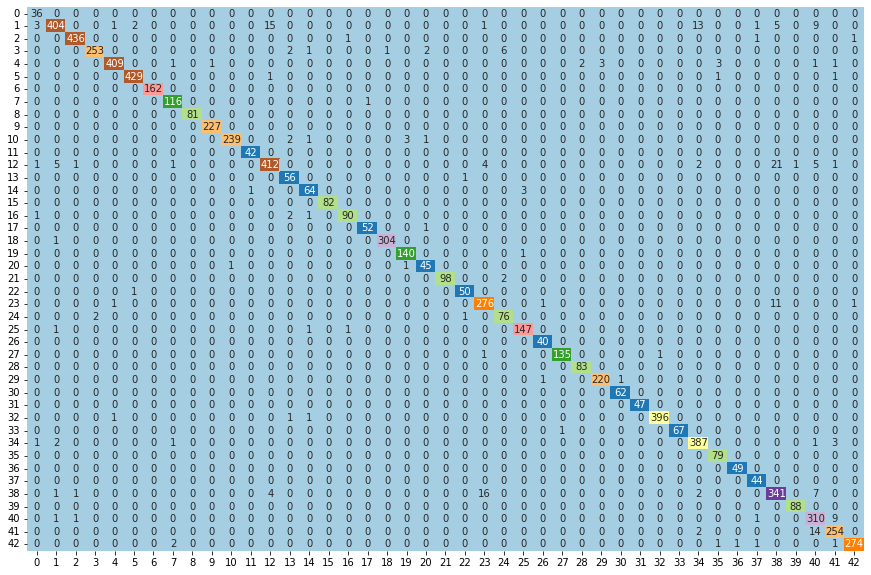

In [ ]:
cm7_ac = metrics.confusion_matrix(y_test_arg_wt_cnn, Y_pred_wt_cnn_ac90)
plt.figure(figsize=(15,10))
sns.heatmap(cm7_ac, annot=True,cbar = False, cmap='Paired', fmt="d")
plt.show()

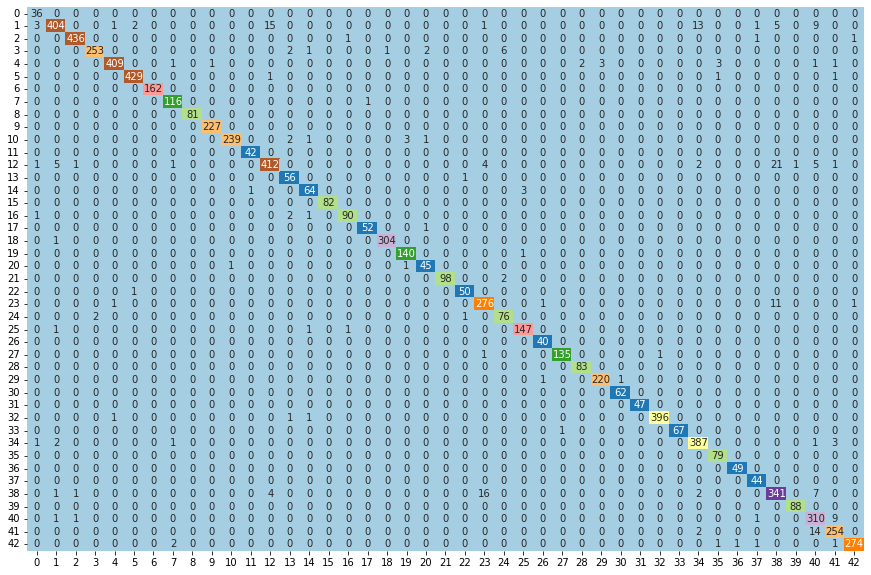

In [ ]:
cm7_wc = metrics.confusion_matrix(y_test_arg_wt_cnn, Y_pred_wt_cnn_180)
plt.figure(figsize=(15,10))
sns.heatmap(cm7_wc, annot=True,cbar = False, cmap='Paired', fmt="d")
plt.show()

In [ ]:
classwise_acc = cm7_c.diagonal()/cm7_c.sum(axis=1) * 100
balanced_WT_cnn_acc7_c90 = classwise_acc.tolist()

classwise_acc = cm7_ac.diagonal()/cm7_ac.sum(axis=1) * 100
balanced_WT_cnn_acc7_ac90 = classwise_acc.tolist()

classwise_acc = cm7_wc.diagonal()/cm7_wc.sum(axis=1) * 100
balanced_WT_cnn_acc7_180 = classwise_acc.tolist()

In [ ]:
zipped = list(zip(balanced_WT_cnn_acc7_c90,balanced_WT_cnn_acc7_ac90,balanced_WT_cnn_acc7_180))
df7= pd.DataFrame(zipped, columns=['clockwise_90', 'anticlockwise_90', 'rotation_180'])
df7

clockwise_90  anticlockwise_90  rotation_180
0     100.000000        100.000000    100.000000
1      88.986784         88.986784     88.986784
2      99.316629         99.316629     99.316629
3      95.471698         95.471698     95.471698
4      97.149644         97.149644     97.149644
5      99.305556         99.305556     99.305556
6     100.000000        100.000000    100.000000
7      99.145299         99.145299     99.145299
8     100.000000        100.000000    100.000000
9     100.000000        100.000000    100.000000
10     97.154472         97.154472     97.154472
11    100.000000        100.000000    100.000000
12     90.748899         90.748899     90.748899
13     98.245614         98.245614     98.245614
14     94.117647         94.117647     94.117647
15    100.000000        100.000000    100.000000
16     95.744681         95.744681     95.744681
17     98.113208         98.113208     98.113208
18     99.672131         99.672131     99.672131
19     99.290780         99.290780     99.290780
20     95.744681         95.744681     95.744681
21     98.000000         98.000000     98.000000
22     98.039216         98.039216     98.039216
23     95.172414         95.172414     95.172414
24     96.202532         96.202532     96.202532
25     98.000000         98.000000     98.000000
26    100.000000        100.000000    100.000000
27     98.540146         98.540146     98.540146
28    100.000000        100.000000    100.000000
29     99.099099         99.099099     99.099099
30    100.000000        100.000000    100.000000
31    100.000000        100.000000    100.000000
32     99.248120         99.248120     99.248120
33     98.529412         98.529412     98.529412
34     97.974684         97.974684     97.974684
35    100.000000        100.000000    100.000000
36    100.000000        100.000000    100.000000
37    100.000000        100.000000    100.000000
38     91.666667         91.666667     91.666667
39    100.000000        100.000000    100.000000
40     96.273292         96.273292     96.273292
41     94.074074         94.074074     94.074074
42     97.857143         97.857143     97.857143

In [ ]:
df7.to_csv('/content/drive/MyDrive/DBDA_PROJECT/img_rotation/balanced_WT_cnn.csv',encoding = 'utf-8-sig')


In [ ]:
# # accuracy: (tp + tn) / (p + n)
# accuracy = accuracy_score(y_test_arg_wt_cnn, Y_pred_wt_cnn)
# print('Accuracy: %f' % accuracy)
# # precision tp / (tp + fp)
# precision = precision_score(y_test_arg_wt_cnn, Y_pred_wt_cnn,average='weighted')
# print('Precision: %f' % precision)
# # recall: tp / (tp + fn)
# recall = recall_score(y_test_arg_wt_cnn, Y_pred_wt_cnn,average='weighted')
# print('Recall: %f' % recall)
# # f1: 2 tp / (2 tp + fp + fn)
# f1 = f1_score(y_test_arg_wt_cnn, Y_pred_wt_cnn,average='weighted')
# print('F1 score: %f' % f1)

In [ ]:
# mod="balanced_WT_cnn"
# data = np.array([[mod,accuracy,precision,recall,f1]]) 
# df7 = pd.DataFrame(data, columns = ['Model','Accuracy', 'Precision','Recall', 'F1 Score'])
# df7


In [ ]:
# # saving the dataframe
# df7.to_csv('/content/drive/MyDrive/DBDA_PROJECT/Gaussian_noise/balanced_WT_cnn.csv',encoding = 'utf-8-sig')



In [ ]:
# # Saving the model
# model7.save("/content/drive/MyDrive/DBDA_PROJECT/Gaussian_noise/balanced_WT_cnn.h5")

In [ ]:
# # saving classification report to csv
# clsf_report = pd.DataFrame(classification_report(y_true =y_test_arg_wt_cnn,  y_pred =   Y_pred_wt_cnn, output_dict=True)).transpose()
# clsf_report.to_csv('/content/drive/MyDrive/DBDA_PROJECT/balanced_WT_cnn.csv', index= True)

# **Model 8-ResNet 152 layer weight-class approch**

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [ ]:
resnet_preTrained = tf.keras.applications.ResNet50V2(
    include_top=False,
    weights=None,
    input_shape=(32,32, 3),
)

In [ ]:
#taking 152th layer of resnet50V2 as an output layer
x = resnet_preTrained.layers[152].output
x = Flatten()(x)                                       #flattening
x = Dropout(0.1)(x)                                    #dropout
output = Dense(43, activation= 'softmax')(x)
model8 = Model(inputs = resnet_preTrained.input, outputs = output)
model8.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_5[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 pool1_pad (ZeroPadding2D)      (None, 18, 18, 64)   0           ['conv1_conv[0][0]']             
                                                                                            

In [ ]:
#optimizer
optim = tf.keras.optimizers.Adam(
    learning_rate=0.001,epsilon=1e-07, amsgrad=False,
    name='Adam'
)

In [ ]:
#compiling the model
model8.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#training the model
n_epochs = 25
history8 =  model8.fit(X_train_m, y_train_m,class_weight=class_weight_dict, batch_size = 256, validation_split = 0.15, epochs = n_epochs, verbose = 1)


Epoch 1/25
105/105 [==============================] - 13s 86ms/step - loss: 2.0799 - accuracy: 0.3553 - val_loss: 2.9134 - val_accuracy: 0.2030
Epoch 2/25
105/105 [==============================] - 7s 68ms/step - loss: 0.5506 - accuracy: 0.7666 - val_loss: 1.2990 - val_accuracy: 0.6042
Epoch 3/25
105/105 [==============================] - 7s 65ms/step - loss: 0.2364 - accuracy: 0.8921 - val_loss: 0.5163 - val_accuracy: 0.8340
Epoch 4/25
105/105 [==============================] - 7s 69ms/step - loss: 0.1344 - accuracy: 0.9388 - val_loss: 0.3665 - val_accuracy: 0.8856
Epoch 5/25
105/105 [==============================] - 7s 70ms/step - loss: 0.1344 - accuracy: 0.9414 - val_loss: 0.7750 - val_accuracy: 0.7822
Epoch 6/25
105/105 [==============================] - 7s 71ms/step - loss: 0.0794 - accuracy: 0.9620 - val_loss: 0.2462 - val_accuracy: 0.9259
Epoch 7/25
105/105 [==============================] - 7s 66ms/step - loss: 0.1223 - accuracy: 0.9489 - val_loss: 1.0126 - val_accuracy: 0.756

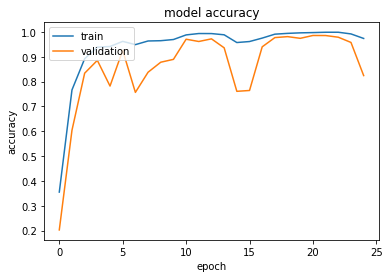

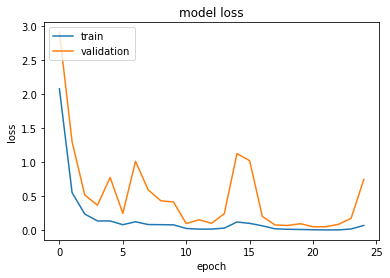

In [ ]:
# summarize history for accuracy
plt.plot(history8.history['accuracy'])
plt.plot(history8.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history8.history['loss'])
plt.plot(history8.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
# clockwise
Y_pred_wt_rn_c90 = np.argmax(model8.predict(X_test_c90), axis=1)
Y_pred_wt_rn_c90
y_test_arg_wt_rn=np.argmax(y_test,axis=1)

In [ ]:
# anti-clockwise
Y_pred_wt_rn_ac90 = np.argmax(model8.predict(X_test_ac90), axis=1)
Y_pred_wt_rn_ac90
y_test_arg_wt_rn=np.argmax(y_test,axis=1)

In [ ]:
# 180
Y_pred_wt_rn_180 = np.argmax(model8.predict(X_test_c180), axis=1)
Y_pred_wt_rn_180
y_test_arg_wt_rn=np.argmax(y_test,axis=1)

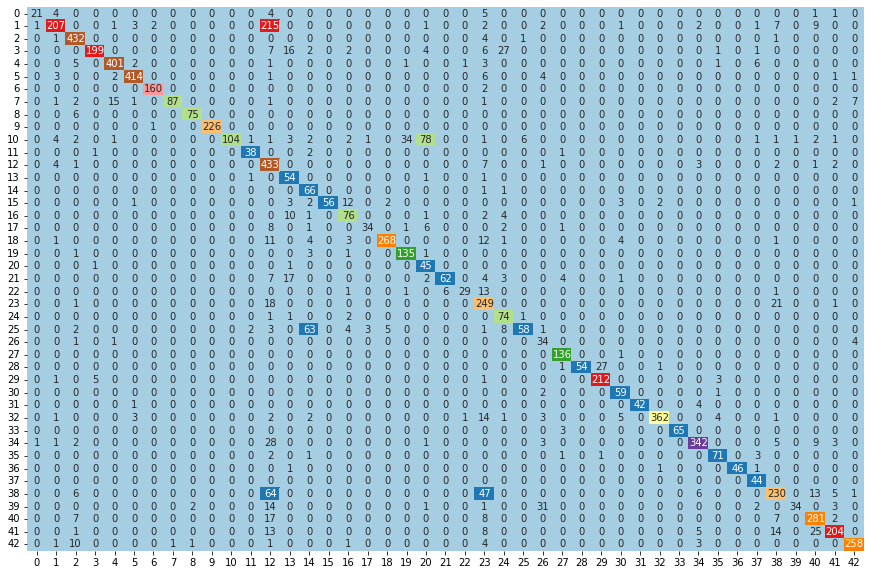

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score,confusion_matrix
import sklearn.metrics as metrics
cm8_c = metrics.confusion_matrix(y_test_arg_wt_rn, Y_pred_wt_rn_c90)
plt.figure(figsize=(15,10))
sns.heatmap(cm8_c, annot=True,cbar = False, cmap='Paired', fmt="d")
plt.show()

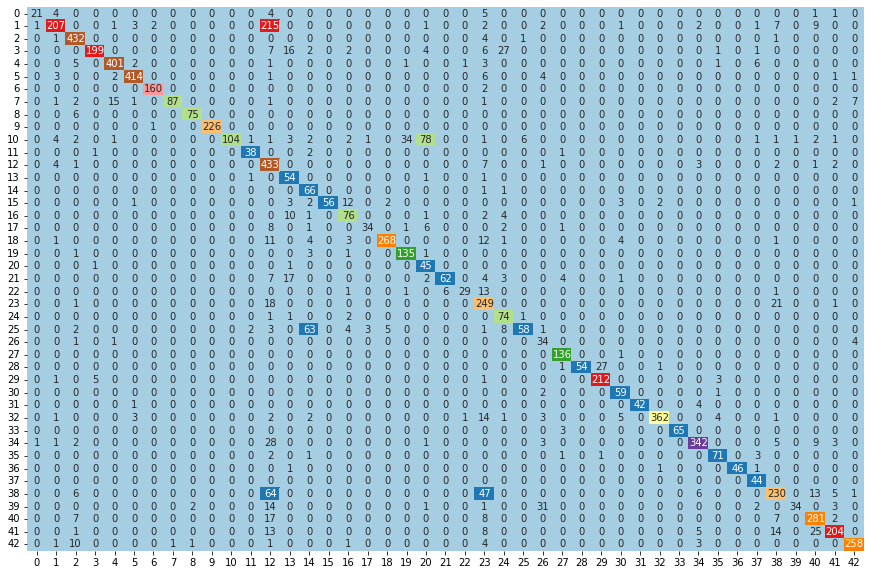

In [ ]:
cm8_ac = metrics.confusion_matrix(y_test_arg_wt_rn, Y_pred_wt_rn_ac90)
plt.figure(figsize=(15,10))
sns.heatmap(cm8_ac, annot=True,cbar = False, cmap='Paired', fmt="d")
plt.show()

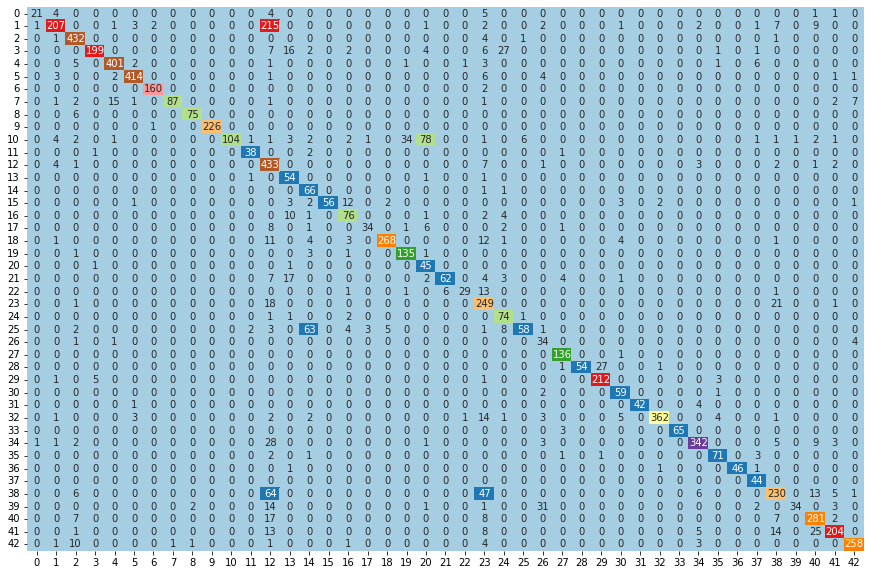

In [ ]:
cm8_wc = metrics.confusion_matrix(y_test_arg_wt_rn, Y_pred_wt_rn_180)
plt.figure(figsize=(15,10))
sns.heatmap(cm8_wc, annot=True,cbar = False, cmap='Paired', fmt="d")
plt.show()

In [ ]:
classwise_acc = cm8_c.diagonal()/cm8_c.sum(axis=1) * 100
balanced_wt_ResNet_152_acc8_c90 = classwise_acc.tolist()

classwise_acc = cm8_ac.diagonal()/cm8_ac.sum(axis=1) * 100
balanced_wt_ResNet_152_acc8_ac90 = classwise_acc.tolist()

classwise_acc = cm8_wc.diagonal()/cm8_wc.sum(axis=1) * 100
balanced_wt_ResNet_152_acc8_180 = classwise_acc.tolist()

In [ ]:
zipped = list(zip(balanced_wt_ResNet_152_acc8_c90,balanced_wt_ResNet_152_acc8_ac90,balanced_wt_ResNet_152_acc8_180))
df8= pd.DataFrame(zipped, columns=['clockwise_90', 'anticlockwise_90', 'rotation_180'])
df8

clockwise_90  anticlockwise_90  rotation_180
0      58.333333         58.333333     58.333333
1      45.594714         45.594714     45.594714
2      98.405467         98.405467     98.405467
3      75.094340         75.094340     75.094340
4      95.249406         95.249406     95.249406
5      95.833333         95.833333     95.833333
6      98.765432         98.765432     98.765432
7      74.358974         74.358974     74.358974
8      92.592593         92.592593     92.592593
9      99.559471         99.559471     99.559471
10     42.276423         42.276423     42.276423
11     90.476190         90.476190     90.476190
12     95.374449         95.374449     95.374449
13     94.736842         94.736842     94.736842
14     97.058824         97.058824     97.058824
15     68.292683         68.292683     68.292683
16     80.851064         80.851064     80.851064
17     64.150943         64.150943     64.150943
18     87.868852         87.868852     87.868852
19     95.744681         95.744681     95.744681
20     95.744681         95.744681     95.744681
21     62.000000         62.000000     62.000000
22     56.862745         56.862745     56.862745
23     85.862069         85.862069     85.862069
24     93.670886         93.670886     93.670886
25     38.666667         38.666667     38.666667
26     85.000000         85.000000     85.000000
27     99.270073         99.270073     99.270073
28     65.060241         65.060241     65.060241
29     95.495495         95.495495     95.495495
30     95.161290         95.161290     95.161290
31     89.361702         89.361702     89.361702
32     90.726817         90.726817     90.726817
33     95.588235         95.588235     95.588235
34     86.582278         86.582278     86.582278
35     89.873418         89.873418     89.873418
36     93.877551         93.877551     93.877551
37    100.000000        100.000000    100.000000
38     61.827957         61.827957     61.827957
39     38.636364         38.636364     38.636364
40     87.267081         87.267081     87.267081
41     75.555556         75.555556     75.555556
42     92.142857         92.142857     92.142857

In [ ]:
df8.to_csv('/content/drive/MyDrive/DBDA_PROJECT/img_rotation/balanced_wt_ResNet_152.csv',encoding = 'utf-8-sig')


In [ ]:
# # accuracy: (tp + tn) / (p + n)
# accuracy = accuracy_score(y_test_arg_wt_rn, Y_pred_wt_rn)
# print('Accuracy: %f' % accuracy)
# # precision tp / (tp + fp)
# precision = precision_score(y_test_arg_wt_rn, Y_pred_wt_rn,average='weighted')
# print('Precision: %f' % precision)
# # recall: tp / (tp + fn)
# recall = recall_score(y_test_arg_wt_rn, Y_pred_wt_rn,average='weighted')
# print('Recall: %f' % recall)
# # f1: 2 tp / (2 tp + fp + fn)
# f1 = f1_score(y_test_arg_wt_rn, Y_pred_wt_rn,average='weighted')
# print('F1 score: %f' % f1)

In [ ]:
# mod="balanced_wt_ResNet_152"
# data = np.array([[mod,accuracy,precision,recall,f1]]) 
# df8 = pd.DataFrame(data, columns = ['Model','Accuracy', 'Precision','Recall', 'F1 Score'])
# df8

In [ ]:
# # saving the dataframe
# df8.to_csv('/content/drive/MyDrive/DBDA_PROJECT/Gaussian_noise/balanced_wt_ResNet_152.csv',encoding = 'utf-8-sig')


In [ ]:
# # Saving the model
# model8.save("/content/drive/MyDrive/DBDA_PROJECT/Gaussian_noise/balanced_wt_ResNet_152.h5")

In [ ]:
# # saving classification report to csv
# clsf_report = pd.DataFrame(classification_report(y_true =y_test_arg_wt_rn,   y_pred =  Y_pred_wt_rn, output_dict=True)).transpose()
# clsf_report.to_csv('/content/drive/MyDrive/DBDA_PROJECT/Gaussian_noise/balanced_wt_ResNet_152.csv', index= True)

In [ ]:
# ResNet with 50 layer and imagenet weight

# Model 9- ResNet with 50 layer and weighted-class approch

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [ ]:
resnet_preTrained = tf.keras.applications.ResNet50V2(
    include_top=False,
    weights='imagenet',
    input_shape=(32,32, 3),
)

In [ ]:
#taking 50th layer of resnet50V2 as an output layer
x = resnet_preTrained.layers[50].output
x = Flatten()(x)                                       #flattening
x = Dropout(0.1)(x)                                    #dropout
output = Dense(43, activation= 'softmax')(x)
model9 = Model(inputs = resnet_preTrained.input, outputs = output)
model9.summary()


Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_6[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 pool1_pad (ZeroPadding2D)      (None, 18, 18, 64)   0           ['conv1_conv[0][0]']             
                                                                                            

In [ ]:
#optimizer
optim = tf.keras.optimizers.Adam(
    learning_rate=0.001,epsilon=1e-07, amsgrad=False,
    name='Adam'
)

In [ ]:
#compiling the model
model9.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#training the model
n_epochs = 35
history9 =  model9.fit(X_train_m, y_train_m,class_weight=class_weight_dict, batch_size = 256, validation_split = 0.15, epochs = n_epochs, verbose = 1)

Epoch 1/35
105/105 [==============================] - 5s 30ms/step - loss: 0.6661 - accuracy: 0.8063 - val_loss: 0.2739 - val_accuracy: 0.9108
Epoch 2/35
105/105 [==============================] - 3s 26ms/step - loss: 0.0553 - accuracy: 0.9754 - val_loss: 0.1335 - val_accuracy: 0.9541
Epoch 3/35
105/105 [==============================] - 3s 27ms/step - loss: 0.0270 - accuracy: 0.9893 - val_loss: 0.2225 - val_accuracy: 0.9301
Epoch 4/35
105/105 [==============================] - 3s 27ms/step - loss: 0.0321 - accuracy: 0.9860 - val_loss: 0.2302 - val_accuracy: 0.9374
Epoch 5/35
105/105 [==============================] - 3s 29ms/step - loss: 0.0249 - accuracy: 0.9884 - val_loss: 0.2878 - val_accuracy: 0.9229
Epoch 6/35
105/105 [==============================] - 4s 34ms/step - loss: 0.0179 - accuracy: 0.9921 - val_loss: 0.2469 - val_accuracy: 0.9367
Epoch 7/35
105/105 [==============================] - 3s 31ms/step - loss: 0.0267 - accuracy: 0.9892 - val_loss: 0.2861 - val_accuracy: 0.9272

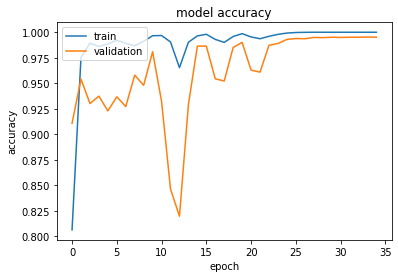

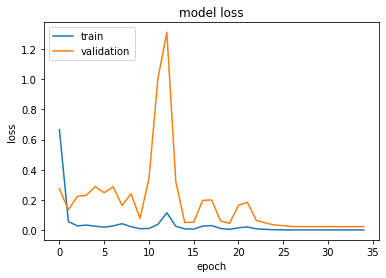

In [ ]:
# summarize history for accuracy
plt.plot(history9.history['accuracy'])
plt.plot(history9.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history9.history['loss'])
plt.plot(history9.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
Y_pred_wt_rn50_c90 = np.argmax(model9.predict(X_test_c90), axis=1)
Y_pred_wt_rn50_c90
y_test_arg_wt_rn50=np.argmax(y_test,axis=1)

In [ ]:
Y_pred_wt_rn50_ac90 = np.argmax(model9.predict(X_test_ac90), axis=1)
Y_pred_wt_rn50_ac90
y_test_arg_wt_rn50=np.argmax(y_test,axis=1)

In [ ]:
Y_pred_wt_rn50_180 = np.argmax(model9.predict(X_test_c180), axis=1)
Y_pred_wt_rn50_180
y_test_arg_wt_rn50=np.argmax(y_test,axis=1)

In [ ]:
# print(classification_report(y_test_arg_wt_rn50, Y_pred_wt_rn50))

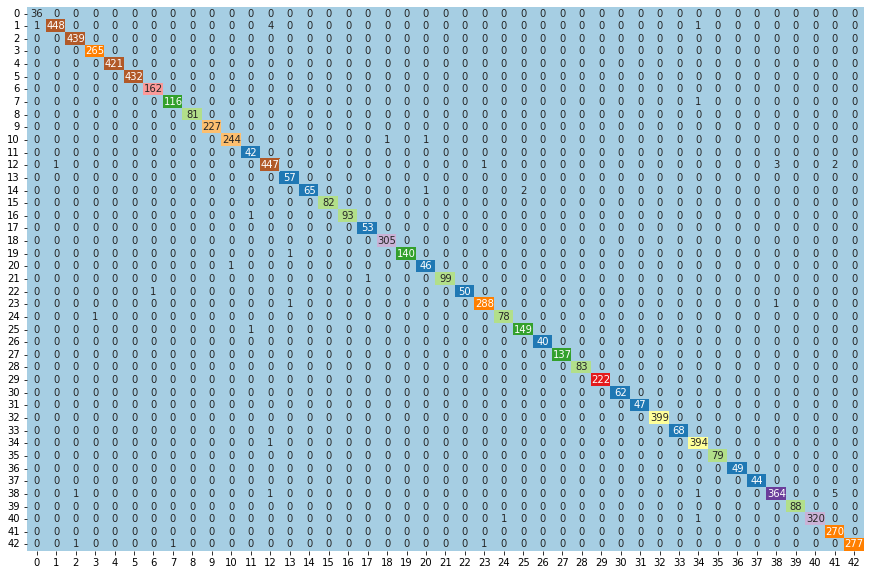

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score,confusion_matrix
import sklearn.metrics as metrics
cm9_c = metrics.confusion_matrix(y_test_arg_wt_rn50, Y_pred_wt_rn50_c90)
plt.figure(figsize=(15,10))
sns.heatmap(cm9_c, annot=True,cbar = False, cmap='Paired', fmt="d")
plt.show()

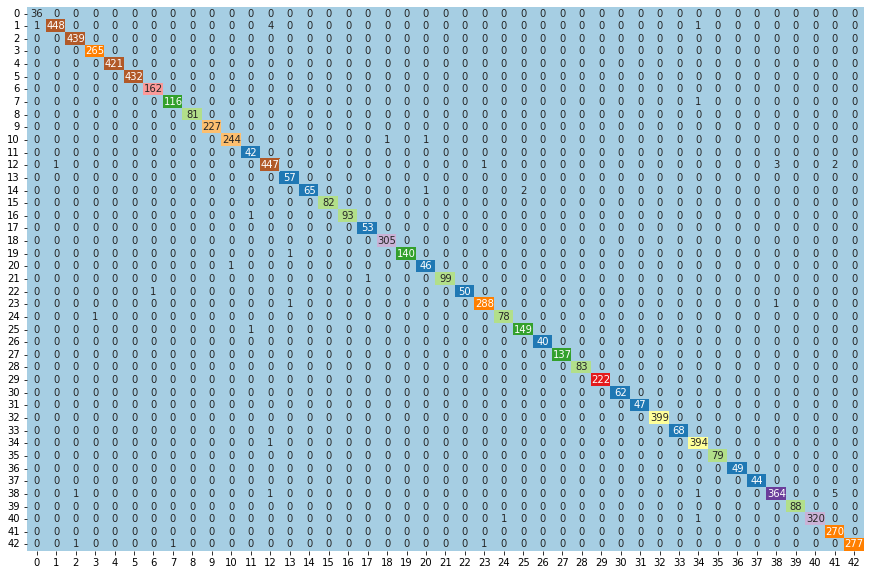

In [ ]:
cm9_ac = metrics.confusion_matrix(y_test_arg_wt_rn50, Y_pred_wt_rn50_ac90)
plt.figure(figsize=(15,10))
sns.heatmap(cm9_ac, annot=True,cbar = False, cmap='Paired', fmt="d")
plt.show()

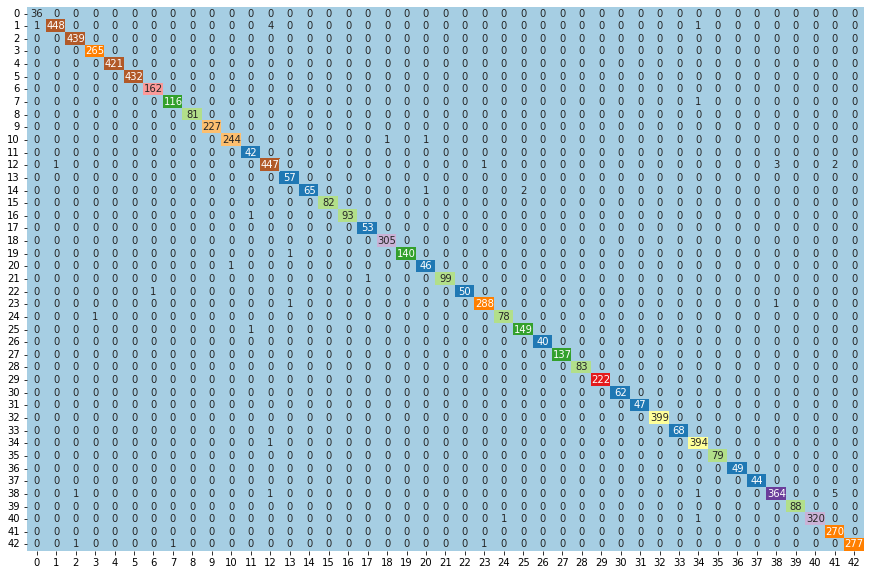

In [ ]:
cm9_wc = metrics.confusion_matrix(y_test_arg_wt_rn50, Y_pred_wt_rn50_180)
plt.figure(figsize=(15,10))
sns.heatmap(cm9_wc, annot=True,cbar = False, cmap='Paired', fmt="d")
plt.show()

In [ ]:
classwise_acc = cm9_c.diagonal()/cm9_c.sum(axis=1) * 100
balanced_wt_ResNet_50_acc9 = classwise_acc.tolist()

classwise_acc = cm9_ac.diagonal()/cm9_ac.sum(axis=1) * 100
balanced_wt_ResNet_50_acc9 = classwise_acc.tolist()

classwise_acc = cm9_wc.diagonal()/cm9_wc.sum(axis=1) * 100
balanced_wt_ResNet_50_acc9 = classwise_acc.tolist()

In [ ]:
zipped = list(zip(balanced_wt_ResNet_50_acc9,balanced_wt_ResNet_50_acc9,balanced_wt_ResNet_50_acc9))
df9= pd.DataFrame(zipped, columns=['clockwise_90', 'anticlockwise_90', 'rotation_180'])
df9


clockwise_90  anticlockwise_90  rotation_180
0     100.000000        100.000000    100.000000
1      98.678414         98.678414     98.678414
2     100.000000        100.000000    100.000000
3     100.000000        100.000000    100.000000
4     100.000000        100.000000    100.000000
5     100.000000        100.000000    100.000000
6     100.000000        100.000000    100.000000
7      99.145299         99.145299     99.145299
8     100.000000        100.000000    100.000000
9     100.000000        100.000000    100.000000
10     99.186992         99.186992     99.186992
11    100.000000        100.000000    100.000000
12     98.458150         98.458150     98.458150
13    100.000000        100.000000    100.000000
14     95.588235         95.588235     95.588235
15    100.000000        100.000000    100.000000
16     98.936170         98.936170     98.936170
17    100.000000        100.000000    100.000000
18    100.000000        100.000000    100.000000
19     99.290780         99.290780     99.290780
20     97.872340         97.872340     97.872340
21     99.000000         99.000000     99.000000
22     98.039216         98.039216     98.039216
23     99.310345         99.310345     99.310345
24     98.734177         98.734177     98.734177
25     99.333333         99.333333     99.333333
26    100.000000        100.000000    100.000000
27    100.000000        100.000000    100.000000
28    100.000000        100.000000    100.000000
29    100.000000        100.000000    100.000000
30    100.000000        100.000000    100.000000
31    100.000000        100.000000    100.000000
32    100.000000        100.000000    100.000000
33    100.000000        100.000000    100.000000
34     99.746835         99.746835     99.746835
35    100.000000        100.000000    100.000000
36    100.000000        100.000000    100.000000
37    100.000000        100.000000    100.000000
38     97.849462         97.849462     97.849462
39    100.000000        100.000000    100.000000
40     99.378882         99.378882     99.378882
41    100.000000        100.000000    100.000000
42     98.928571         98.928571     98.928571

In [ ]:
df9.to_csv('/content/drive/MyDrive/DBDA_PROJECT/img_rotation/balanced_wt_ResNet_50.csv',encoding = 'utf-8-sig')


In [ ]:
# # accuracy: (tp + tn) / (p + n)
# accuracy = accuracy_score(y_test_arg_wt_rn50, Y_pred_wt_rn50)
# print('Accuracy: %f' % accuracy)
# # precision tp / (tp + fp)
# precision = precision_score(y_test_arg_wt_rn50, Y_pred_wt_rn50,average='weighted')
# print('Precision: %f' % precision)
# # recall: tp / (tp + fn)
# recall = recall_score(y_test_arg_wt_rn50, Y_pred_wt_rn50,average='weighted')
# print('Recall: %f' % recall)
# # f1: 2 tp / (2 tp + fp + fn)
# f1 = f1_score(y_test_arg_wt_rn50, Y_pred_wt_rn50,average='weighted')
# print('F1 score: %f' % f1)

In [ ]:

# mod="balanced_wt_ResNet_50"
# data = np.array([[mod,accuracy,precision,recall,f1]]) 
# df9 = pd.DataFrame(data, columns = ['Model','Accuracy', 'Precision','Recall', 'F1 Score'])
# df9

In [ ]:
# # saving the dataframe
# df9.to_csv('/content/drive/MyDrive/DBDA_PROJECT/Gaussian_noise/balanced_wt_ResNet_50.csv',encoding = 'utf-8-sig')


In [ ]:
# # Saving the model
# model9.save("/content/drive/MyDrive/DBDA_PROJECT/Gaussian_noise/balanced_wt_ResNet_50.h5")


In [ ]:
# # saving classification report to csv
# clsf_report = pd.DataFrame(classification_report(y_true =y_test_arg_wt_rn50,   y_pred =   Y_pred_wt_rn50, output_dict=True)).transpose()
# clsf_report.to_csv('/content/drive/MyDrive/DBDA_PROJECT/Gaussian_noise/balanced_wt_ResNet_50.csv', index= True)

## **Handel imbalanced data**

## 3) TOMEK LINKS under-sampling

In [ ]:
# tomek undersampling

In [ ]:
from imblearn.under_sampling import TomekLinks

In [ ]:
# Array Estimator expected <= 2. but Found array with dim 4.
# reshaping x
X2 = X.reshape(39249, 32*32*3, order ='a')
X2.shape


(39249, 3072)

In [ ]:

undersample = TomekLinks()
X_t, y_t = undersample.fit_resample(X2, y)

In [ ]:
X_t.shape, y_t.shape


((39187, 3072), (39187, 43))

In [ ]:
X_train_tm, X_test_t, y_train_tm, y_test_t = train_test_split(X_t, y_t, test_size=0.2, random_state=0)


In [ ]:
print("Using TOMEK")
print("X_Train Shape: ",X_train_tm.shape,"\nX_test shape: ",X_test_t.shape,"\ny_train shape: ",y_train_tm.shape,"\ny_Test Shape : ",y_test_t.shape)


Using TOMEK
X_Train Shape:  (31349, 3072) 
X_test shape:  (7838, 3072) 
y_train shape:  (31349, 43) 
y_Test Shape :  (7838, 43)


In [ ]:
X_train_t, X_val_t, y_train_t, y_val_t = train_test_split(X_train_tm, y_train_tm, test_size=0.2, random_state=0)


In [ ]:
print("validation split")
print("X_Train Shape: ",X_train_t.shape,"\nX_validation shape: ",X_val_t.shape,"\ny_train shape: ",y_train_t.shape,"\ny_validation Shape : ",y_val_t.shape)


validation split
X_Train Shape:  (25079, 3072) 
X_validation shape:  (6270, 3072) 
y_train shape:  (25079, 43) 
y_validation Shape :  (6270, 43)


In [ ]:
# cnn expecting 4 dim, so again reshape to orignal
X_train_t = X_train_t.reshape(X_train_t.shape[0],32,32,3)
X_val_t = X_val_t.reshape(X_val_t.shape[0],32,32,3)
X_test_t = X_test_t.reshape(X_test_t.shape[0],32,32,3)


In [ ]:
# X_train_tm = X_train_tm.reshape(X_train_tm.shape[0],32,32,3)


In [ ]:
X_test_t_c90=X_test_t
dataGen = ImageDataGenerator(rotation_range=90)  # DEGREES
dataGen.fit(X_test_t_c90)
X_test_c90.shape

(7850, 32, 32, 3)

In [ ]:
X_test_t_ac90=X_test_t
dataGen = ImageDataGenerator(rotation_range=-90)  # DEGREES
dataGen.fit(X_test_t_ac90)
X_test_ac90.shape

(7850, 32, 32, 3)

In [ ]:
X_test_t_c180=X_test_t
dataGen = ImageDataGenerator(rotation_range=180)  # DEGREES
dataGen.fit(X_test_t_c180)
X_test_c180.shape

(7850, 32, 32, 3)

## Model 10- CNN TOMEK

In [ ]:
# Building a model

In [ ]:
model10 = Sequential()
model10.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model10.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model10.add(MaxPool2D(pool_size=(2, 2)))
model10.add(Dropout(rate=0.25))
model10.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model10.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model10.add(MaxPool2D(pool_size=(2, 2)))
model10.add(Dropout(rate=0.25))
model10.add(Flatten())
model10.add(Dense(256, activation='relu'))
model10.add(Dropout(rate=0.5))
# We have 43 classes that's why we have defined 43 in the dense
model10.add(Dense(43, activation='softmax'))


In [ ]:
#Compilation of the model
model10.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
model10.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 32)        2432      
                                                                 
 conv2d_13 (Conv2D)          (None, 24, 24, 32)        25632     
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 dropout_15 (Dropout)        (None, 12, 12, 32)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 10, 10, 64)        18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 8, 8, 64)          36928     
                                                      

In [ ]:
epochs = 25
history10 = model10.fit(X_train_t, y_train_t, batch_size=64, epochs=epochs, validation_data=(X_val_t, y_val_t))


Epoch 1/25
392/392 [==============================] - 6s 11ms/step - loss: 2.3501 - accuracy: 0.4416 - val_loss: 0.6146 - val_accuracy: 0.8432
Epoch 2/25
392/392 [==============================] - 4s 9ms/step - loss: 0.7190 - accuracy: 0.7900 - val_loss: 0.2417 - val_accuracy: 0.9396
Epoch 3/25
392/392 [==============================] - 3s 8ms/step - loss: 0.4648 - accuracy: 0.8643 - val_loss: 0.1560 - val_accuracy: 0.9550
Epoch 4/25
392/392 [==============================] - 3s 7ms/step - loss: 0.3498 - accuracy: 0.8984 - val_loss: 0.1147 - val_accuracy: 0.9694
Epoch 5/25
392/392 [==============================] - 3s 7ms/step - loss: 0.2855 - accuracy: 0.9153 - val_loss: 0.1060 - val_accuracy: 0.9695
Epoch 6/25
392/392 [==============================] - 3s 9ms/step - loss: 0.2490 - accuracy: 0.9261 - val_loss: 0.0850 - val_accuracy: 0.9802
Epoch 7/25
392/392 [==============================] - 4s 10ms/step - loss: 0.2268 - accuracy: 0.9335 - val_loss: 0.0703 - val_accuracy: 0.9810
Epoc

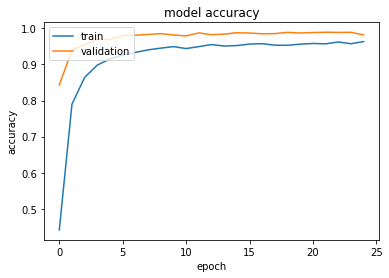

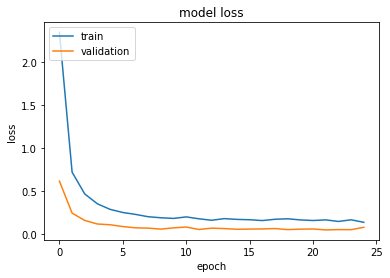

In [ ]:
# summarize history for accuracy
plt.plot(history10.history['accuracy'])
plt.plot(history10.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history10.history['loss'])
plt.plot(history10.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [ ]:
Y_pred_tk_cnn_c90 = np.argmax(model10.predict(X_test_t_c90), axis=1)
Y_pred_tk_cnn_c90
y_test_arg_tk_cnn=np.argmax(y_test_t,axis=1)
print(accuracy_score(y_test_arg_tk_cnn, Y_pred_tk_cnn_c90))

0.9830313855575402


In [ ]:
Y_pred_tk_cnn_ac90 = np.argmax(model10.predict(X_test_t_ac90), axis=1)
Y_pred_tk_cnn_ac90
y_test_arg_tk_cnn=np.argmax(y_test_t,axis=1)
print(accuracy_score(y_test_arg_tk_cnn, Y_pred_tk_cnn_ac90))

0.9830313855575402


In [ ]:
Y_pred_tk_cnn_180 = np.argmax(model10.predict(X_test_t_c180), axis=1)
Y_pred_tk_cnn_180
y_test_arg_tk_cnn=np.argmax(y_test_t,axis=1)
print(accuracy_score(y_test_arg_tk_cnn, Y_pred_tk_cnn_c90))

0.9830313855575402


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
# print(classification_report(y_test_arg_tk_cnn, Y_pred_tk_cnn))


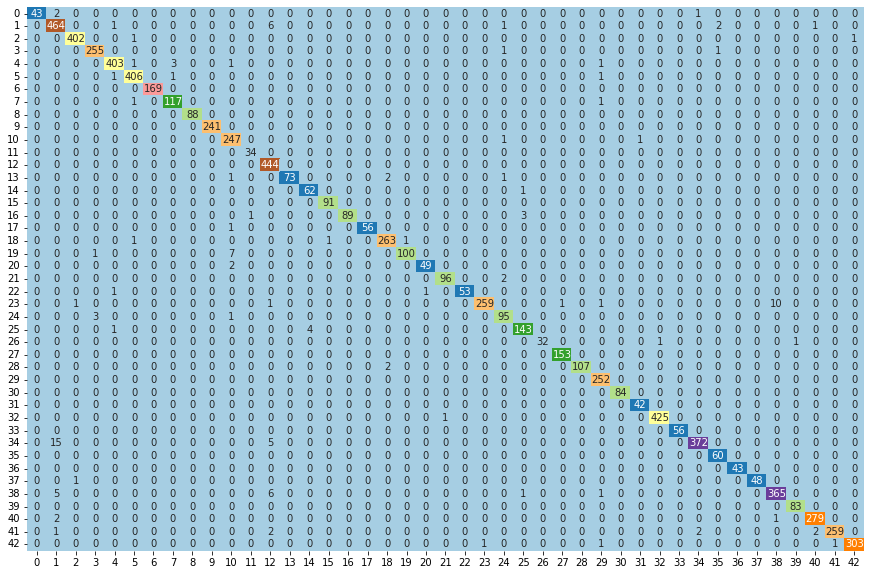

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score,confusion_matrix
import sklearn.metrics as metrics
cm10_c= metrics.confusion_matrix(y_test_arg_tk_cnn, Y_pred_tk_cnn_c90)
plt.figure(figsize=(15,10))
sns.heatmap(cm10_c, annot=True,cbar = False, cmap='Paired', fmt="d")
plt.show()


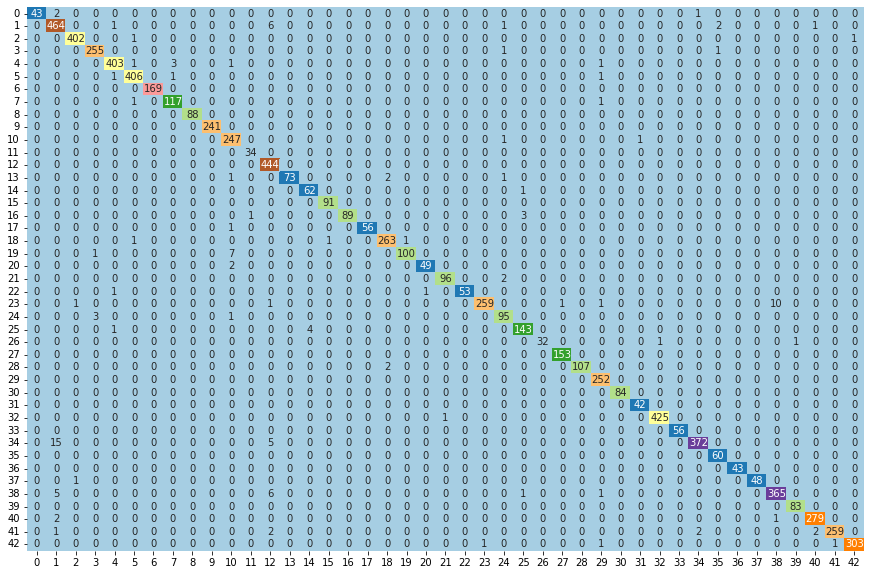

In [ ]:
cm10_ac= metrics.confusion_matrix(y_test_arg_tk_cnn, Y_pred_tk_cnn_ac90)
plt.figure(figsize=(15,10))
sns.heatmap(cm10_ac, annot=True,cbar = False, cmap='Paired', fmt="d")
plt.show()

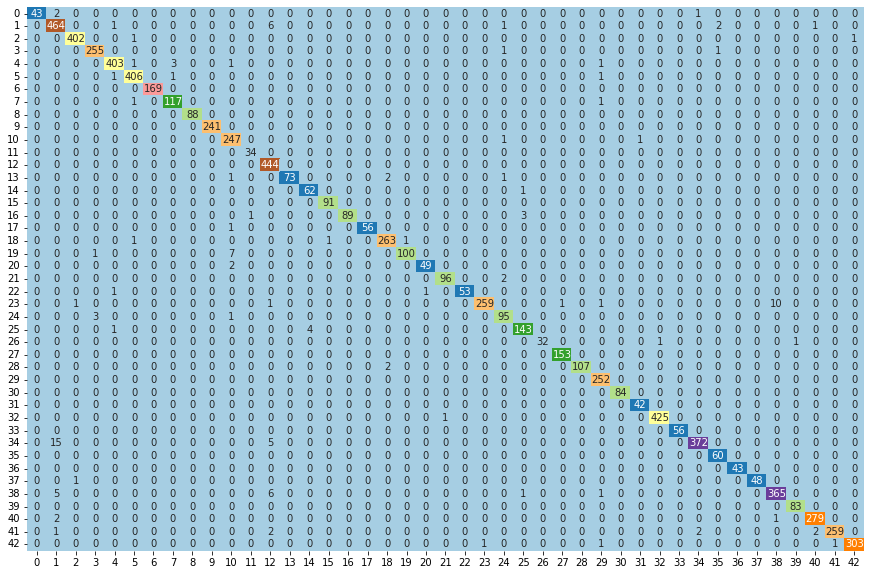

In [ ]:
cm10_wc= metrics.confusion_matrix(y_test_arg_tk_cnn, Y_pred_tk_cnn_180)
plt.figure(figsize=(15,10))
sns.heatmap(cm10_wc, annot=True,cbar = False, cmap='Paired', fmt="d")
plt.show()

In [ ]:
classwise_acc = cm10_c.diagonal()/cm10_c.sum(axis=1) * 100
balanced_tk_cnn_acc10_c90 = classwise_acc.tolist()

classwise_acc = cm10_ac.diagonal()/cm10_ac.sum(axis=1) * 100
balanced_tk_cnn_acc10_ac90 = classwise_acc.tolist()

classwise_acc = cm10_wc.diagonal()/cm10_wc.sum(axis=1) * 100
balanced_tk_cnn_acc10_180 = classwise_acc.tolist()

In [ ]:
zipped = list(zip(balanced_tk_cnn_acc10_c90,balanced_tk_cnn_acc10_ac90,balanced_tk_cnn_acc10_180))
df10= pd.DataFrame(zipped, columns=['clockwise_90', 'anticlockwise_90', 'rotation_180'])
df10


clockwise_90  anticlockwise_90  rotation_180
0      93.478261         93.478261     93.478261
1      97.684211         97.684211     97.684211
2      99.504950         99.504950     99.504950
3      99.221790         99.221790     99.221790
4      98.533007         98.533007     98.533007
5      99.266504         99.266504     99.266504
6     100.000000        100.000000    100.000000
7      98.319328         98.319328     98.319328
8     100.000000        100.000000    100.000000
9     100.000000        100.000000    100.000000
10     99.196787         99.196787     99.196787
11    100.000000        100.000000    100.000000
12    100.000000        100.000000    100.000000
13     94.805195         94.805195     94.805195
14     98.412698         98.412698     98.412698
15    100.000000        100.000000    100.000000
16     95.698925         95.698925     95.698925
17     98.245614         98.245614     98.245614
18     98.872180         98.872180     98.872180
19     92.592593         92.592593     92.592593
20     96.078431         96.078431     96.078431
21     97.959184         97.959184     97.959184
22     96.363636         96.363636     96.363636
23     94.871795         94.871795     94.871795
24     95.959596         95.959596     95.959596
25     96.621622         96.621622     96.621622
26     94.117647         94.117647     94.117647
27    100.000000        100.000000    100.000000
28     98.165138         98.165138     98.165138
29    100.000000        100.000000    100.000000
30    100.000000        100.000000    100.000000
31    100.000000        100.000000    100.000000
32     99.765258         99.765258     99.765258
33    100.000000        100.000000    100.000000
34     94.897959         94.897959     94.897959
35    100.000000        100.000000    100.000000
36    100.000000        100.000000    100.000000
37     97.959184         97.959184     97.959184
38     96.560847         96.560847     96.560847
39    100.000000        100.000000    100.000000
40     98.936170         98.936170     98.936170
41     97.368421         97.368421     97.368421
42     99.019608         99.019608     99.019608

In [ ]:
df10.to_csv('/content/drive/MyDrive/DBDA_PROJECT/img_rotation/balanced_tk_cnn.csv',encoding = 'utf-8-sig')


In [ ]:
# # accuracy: (tp + tn) / (p + n)
# accuracy = accuracy_score(y_test_arg_tk_cnn, Y_pred_tk_cnn)
# print('Accuracy: %f' % accuracy)
# # precision tp / (tp + fp)
# precision = precision_score(y_test_arg_tk_cnn, Y_pred_tk_cnn,average='weighted')
# print('Precision: %f' % precision)
# # recall: tp / (tp + fn)
# recall = recall_score(y_test_arg_tk_cnn, Y_pred_tk_cnn,average='weighted')
# print('Recall: %f' % recall)
# # f1: 2 tp / (2 tp + fp + fn)
# f1 = f1_score(y_test_arg_tk_cnn, Y_pred_tk_cnn,average='weighted')
# print('F1 score: %f' % f1)


In [ ]:
# mod="balanced_tk_cnn"
# data = np.array([[mod,accuracy,precision,recall,f1]]) 
# df10 = pd.DataFrame(data, columns = ['Model','Accuracy', 'Precision','Recall', 'F1 Score'])
# df10


In [ ]:
# # saving the dataframe
# df10.to_csv('/content/drive/MyDrive/DBDA_PROJECT/Gaussian_noise/balanced_tk_cnn.csv',encoding = 'utf-8-sig')


In [ ]:
# # Saving the model
# model10.save("/content/drive/MyDrive/DBDA_PROJECT/Gaussian_noise/balanced_tk_cnn.h5")


In [ ]:

# clsf_report = pd.DataFrame(classification_report(y_true = y_test_arg_tk_cnn, y_pred =  Y_pred_tk_cnn, output_dict=True)).transpose()
# clsf_report.to_csv('/content/drive/MyDrive/DBDA_PROJECT/Gaussian_noise/balanced_tk_cnn.csv', index= True)



## Model 11 - ResNet50 with 152 layer-TOMEK

In [ ]:
# Resnet 152

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50


In [ ]:
resnet_preTrained = tf.keras.applications.ResNet50V2(
    include_top=False,
    weights=None,
    input_shape=(32,32, 3),
)


In [ ]:
#taking 152th layer of resnet50V2 as an output layer
x = resnet_preTrained.layers[152].output
x = Flatten()(x)                                       #flattening
x = Dropout(0.1)(x)                                    #dropout
output = Dense(43, activation= 'softmax')(x)
model11 = Model(inputs = resnet_preTrained.input, outputs = output)
model11.summary()


Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_7[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 pool1_pad (ZeroPadding2D)      (None, 18, 18, 64)   0           ['conv1_conv[0][0]']             
                                                                                            

In [ ]:

#optimizer
optim = tf.keras.optimizers.Adam(
    learning_rate=0.001,epsilon=1e-07, amsgrad=False,
    name='Adam'
)


In [ ]:
#compiling the model
model11.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
#callbacks
checkpoint = ModelCheckpoint('./best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max')

early = EarlyStopping(monitor='val_accuracy', patience=5, mode='max', restore_best_weights=True)

reduceLR = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.001)


In [ ]:

#training the model
n_epochs = 25
history11 =  model11.fit(X_train_t, y_train_t,  batch_size = 256, validation_data = (X_val_t, y_val_t), epochs = n_epochs, verbose = 1)


Epoch 1/25
98/98 [==============================] - 15s 118ms/step - loss: 1.8396 - accuracy: 0.4700 - val_loss: 2.6261 - val_accuracy: 0.3037
Epoch 2/25
98/98 [==============================] - 10s 97ms/step - loss: 0.4773 - accuracy: 0.8445 - val_loss: 0.9866 - val_accuracy: 0.7018
Epoch 3/25
98/98 [==============================] - 7s 70ms/step - loss: 0.2217 - accuracy: 0.9289 - val_loss: 0.5311 - val_accuracy: 0.8383
Epoch 4/25
98/98 [==============================] - 7s 67ms/step - loss: 0.1312 - accuracy: 0.9565 - val_loss: 0.6770 - val_accuracy: 0.8199
Epoch 5/25
98/98 [==============================] - 7s 73ms/step - loss: 0.0970 - accuracy: 0.9690 - val_loss: 0.3292 - val_accuracy: 0.9049
Epoch 6/25
98/98 [==============================] - 7s 73ms/step - loss: 0.0733 - accuracy: 0.9764 - val_loss: 0.3596 - val_accuracy: 0.9038
Epoch 7/25
98/98 [==============================] - 7s 73ms/step - loss: 0.0816 - accuracy: 0.9748 - val_loss: 0.2883 - val_accuracy: 0.9211
Epoch 8/25

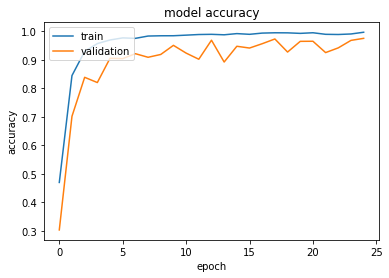

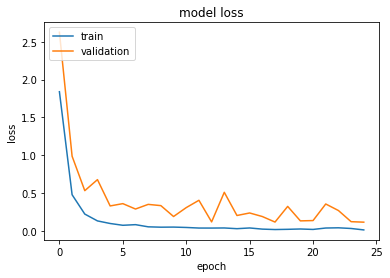

In [ ]:
# summarize history for accuracy
plt.plot(history11.history['accuracy'])
plt.plot(history11.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history11.history['loss'])
plt.plot(history11.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [ ]:
Y_pred_tk_rn_c90 = np.argmax(model11.predict(X_test_t_c90), axis=1)
Y_pred_tk_rn_c90
y_test_arg_tk_rn=np.argmax(y_test_t,axis=1)


In [ ]:
Y_pred_tk_rn_ac90 = np.argmax(model11.predict(X_test_t_ac90), axis=1)
Y_pred_tk_rn_ac90
y_test_arg_tk_rn=np.argmax(y_test_t,axis=1)


In [ ]:
Y_pred_tk_rn_180 = np.argmax(model11.predict(X_test_t_c180), axis=1)
Y_pred_tk_rn_180
y_test_arg_tk_rn=np.argmax(y_test_t,axis=1)


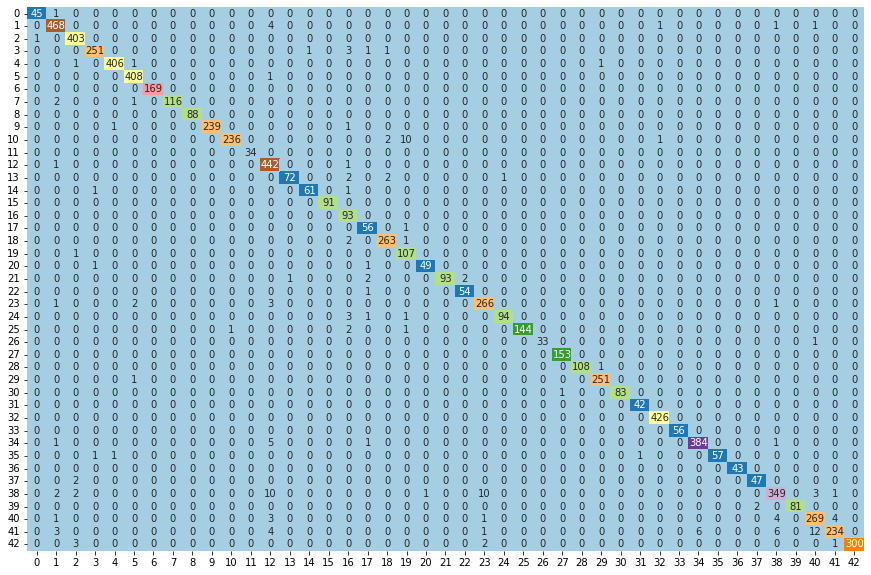

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score,confusion_matrix
import sklearn.metrics as metrics
cm11_c = metrics.confusion_matrix(y_test_arg_tk_rn, Y_pred_tk_rn_c90)
plt.figure(figsize=(15,10))
sns.heatmap(cm11_c, annot=True,cbar = False, cmap='Paired', fmt="d")
plt.show()


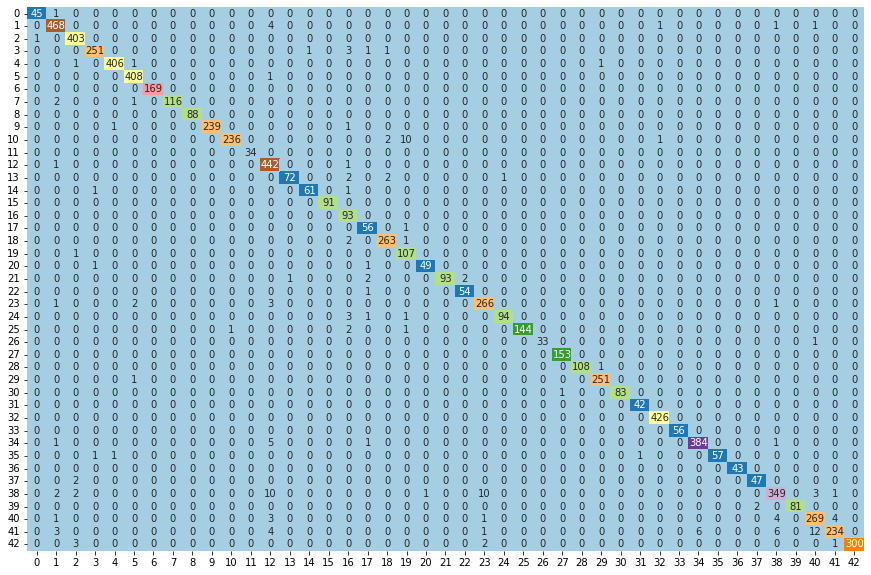

In [ ]:
cm11_ac = metrics.confusion_matrix(y_test_arg_tk_rn, Y_pred_tk_rn_c90)
plt.figure(figsize=(15,10))
sns.heatmap(cm11_ac, annot=True,cbar = False, cmap='Paired', fmt="d")
plt.show()


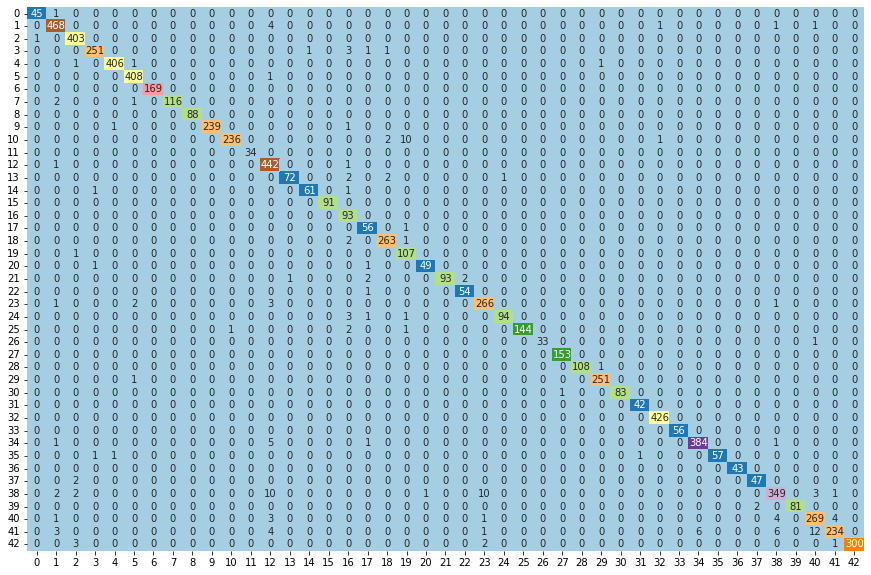

In [ ]:
cm11_wc = metrics.confusion_matrix(y_test_arg_tk_rn, Y_pred_tk_rn_c90)
plt.figure(figsize=(15,10))
sns.heatmap(cm11_wc, annot=True,cbar = False, cmap='Paired', fmt="d")
plt.show()


In [ ]:
classwise_acc = cm11_c.diagonal()/cm11_c.sum(axis=1) * 100
balanced_tk_ResNet50_152_acc11_c90 = classwise_acc.tolist()

classwise_acc = cm11_ac.diagonal()/cm11_ac.sum(axis=1) * 100
balanced_tk_ResNet50_152_acc11_ac90 = classwise_acc.tolist()

classwise_acc = cm11_wc.diagonal()/cm11_wc.sum(axis=1) * 100
balanced_tk_ResNet50_152_acc11_180 = classwise_acc.tolist()

In [ ]:
zipped = list(zip(balanced_tk_ResNet50_152_acc11_c90,balanced_tk_ResNet50_152_acc11_ac90,balanced_tk_ResNet50_152_acc11_180))
df11= pd.DataFrame(zipped, columns=['clockwise_90', 'anticlockwise_90', 'rotation_180'])
df11


clockwise_90  anticlockwise_90  rotation_180
0      97.826087         97.826087     97.826087
1      98.526316         98.526316     98.526316
2      99.752475         99.752475     99.752475
3      97.665370         97.665370     97.665370
4      99.266504         99.266504     99.266504
5      99.755501         99.755501     99.755501
6     100.000000        100.000000    100.000000
7      97.478992         97.478992     97.478992
8     100.000000        100.000000    100.000000
9      99.170124         99.170124     99.170124
10     94.779116         94.779116     94.779116
11    100.000000        100.000000    100.000000
12     99.549550         99.549550     99.549550
13     93.506494         93.506494     93.506494
14     96.825397         96.825397     96.825397
15    100.000000        100.000000    100.000000
16    100.000000        100.000000    100.000000
17     98.245614         98.245614     98.245614
18     98.872180         98.872180     98.872180
19     99.074074         99.074074     99.074074
20     96.078431         96.078431     96.078431
21     94.897959         94.897959     94.897959
22     98.181818         98.181818     98.181818
23     97.435897         97.435897     97.435897
24     94.949495         94.949495     94.949495
25     97.297297         97.297297     97.297297
26     97.058824         97.058824     97.058824
27    100.000000        100.000000    100.000000
28     99.082569         99.082569     99.082569
29     99.603175         99.603175     99.603175
30     98.809524         98.809524     98.809524
31    100.000000        100.000000    100.000000
32    100.000000        100.000000    100.000000
33    100.000000        100.000000    100.000000
34     97.959184         97.959184     97.959184
35     95.000000         95.000000     95.000000
36    100.000000        100.000000    100.000000
37     95.918367         95.918367     95.918367
38     92.328042         92.328042     92.328042
39     97.590361         97.590361     97.590361
40     95.390071         95.390071     95.390071
41     87.969925         87.969925     87.969925
42     98.039216         98.039216     98.039216

In [ ]:
df11.to_csv('/content/drive/MyDrive/DBDA_PROJECT/img_rotation/balanced_tk_ResNet50_152.csv',encoding = 'utf-8-sig')


In [ ]:
# # accuracy: (tp + tn) / (p + n)
# accuracy = accuracy_score(y_test_arg_tk_rn, Y_pred_tk_rn)
# print('Accuracy: %f' % accuracy)
# # precision tp / (tp + fp)
# precision = precision_score(y_test_arg_tk_rn, Y_pred_tk_rn,average='weighted')
# print('Precision: %f' % precision)
# # recall: tp / (tp + fn)
# recall = recall_score(y_test_arg_tk_rn, Y_pred_tk_rn,average='weighted')
# print('Recall: %f' % recall)
# # f1: 2 tp / (2 tp + fp + fn)
# f1 = f1_score(y_test_arg_tk_rn, Y_pred_tk_rn,average='weighted')
# print('F1 score: %f' % f1)


In [ ]:
# mod="balanced_tk_ResNet50_152"
# data = np.array([[mod,accuracy,precision,recall,f1]]) 
# df11 = pd.DataFrame(data, columns = ['Model','Accuracy', 'Precision','Recall', 'F1 Score'])
# df11


In [ ]:
# # saving the dataframe
# df11.to_csv('/content/drive/MyDrive/DBDA_PROJECT/Gaussian_noise/balanced_tk_ResNet50_152.csv',encoding = 'utf-8-sig')


In [ ]:
# # Saving the model
# model11.save("/content/drive/MyDrive/DBDA_PROJECT/Gaussian_noise/balanced_tk_ResNet50_152.h5")


In [ ]:
# # saving classification report to csv
# clsf_report = pd.DataFrame(classification_report(y_true = y_test_arg_tk_rn,  y_pred =Y_pred_tk_rn, output_dict=True)).transpose()
# clsf_report.to_csv('/content/drive/MyDrive/DBDA_PROJECT/Gaussian_noise/balanced_tk_ResNet50_152.csv', index= True)


## Model 12- ResNet50-50 layer-TOMEK 

In [ ]:
# Resnet 50

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50


In [ ]:
resnet_preTrained = tf.keras.applications.ResNet50V2(
    include_top=False,
    weights='imagenet',
    input_shape=(32,32, 3),
)


In [ ]:
#taking 50th layer of resnet50V2 as an output layer
x = resnet_preTrained.layers[50].output
x = Flatten()(x)                                       #flattening
x = Dropout(0.1)(x)                                    #dropout
output = Dense(43, activation= 'softmax')(x)
model12 = Model(inputs = resnet_preTrained.input, outputs = output)
model12.summary()


Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_8[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 pool1_pad (ZeroPadding2D)      (None, 18, 18, 64)   0           ['conv1_conv[0][0]']             
                                                                                            

In [ ]:
#optimizer
optim = tf.keras.optimizers.Adam(
    learning_rate=0.001,epsilon=1e-07, amsgrad=False,
    name='Adam'
)


In [ ]:
#compiling the model
model12.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
#callbacks
checkpoint = ModelCheckpoint('./best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max')

early = EarlyStopping(monitor='val_accuracy', patience=5, mode='max', restore_best_weights=True)

reduceLR = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.001)


In [ ]:
#training the model
n_epochs = 25
history12 =  model12.fit(X_train_t, y_train_t,  batch_size = 256, validation_data = (X_val_t, y_val_t), epochs = n_epochs, verbose = 1)


Epoch 1/25
98/98 [==============================] - 5s 32ms/step - loss: 0.7056 - accuracy: 0.8135 - val_loss: 0.6114 - val_accuracy: 0.8250
Epoch 2/25
98/98 [==============================] - 3s 26ms/step - loss: 0.0542 - accuracy: 0.9828 - val_loss: 0.1511 - val_accuracy: 0.9522
Epoch 3/25
98/98 [==============================] - 3s 26ms/step - loss: 0.0213 - accuracy: 0.9944 - val_loss: 0.1154 - val_accuracy: 0.9654
Epoch 4/25
98/98 [==============================] - 3s 27ms/step - loss: 0.0184 - accuracy: 0.9939 - val_loss: 0.2905 - val_accuracy: 0.9230
Epoch 5/25
98/98 [==============================] - 3s 29ms/step - loss: 0.0158 - accuracy: 0.9949 - val_loss: 0.1083 - val_accuracy: 0.9734
Epoch 6/25
98/98 [==============================] - 3s 34ms/step - loss: 0.0184 - accuracy: 0.9941 - val_loss: 0.2710 - val_accuracy: 0.9317
Epoch 7/25
98/98 [==============================] - 3s 34ms/step - loss: 0.0160 - accuracy: 0.9952 - val_loss: 0.1076 - val_accuracy: 0.9721
Epoch 8/25
98

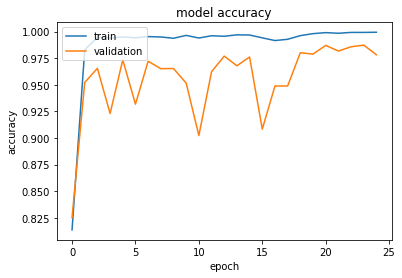

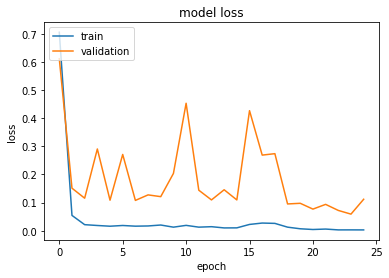

In [ ]:
# summarize history for accuracy
plt.plot(history12.history['accuracy'])
plt.plot(history12.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history12.history['loss'])
plt.plot(history12.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [ ]:
Y_pred_tk_rs_c90 = np.argmax(model12.predict(X_test_t_c90), axis=1)
Y_pred_tk_rs_c90
y_test_arg_tk_rs=np.argmax(y_test_t,axis=1)

In [ ]:
Y_pred_tk_rs_ac90 = np.argmax(model12.predict(X_test_t_ac90), axis=1)
Y_pred_tk_rs_ac90
y_test_arg_tk_rs=np.argmax(y_test_t,axis=1)


In [ ]:
Y_pred_tk_rs_180 = np.argmax(model12.predict(X_test_t_c180), axis=1)
Y_pred_tk_rs_180
y_test_arg_tk_rs=np.argmax(y_test_t,axis=1)


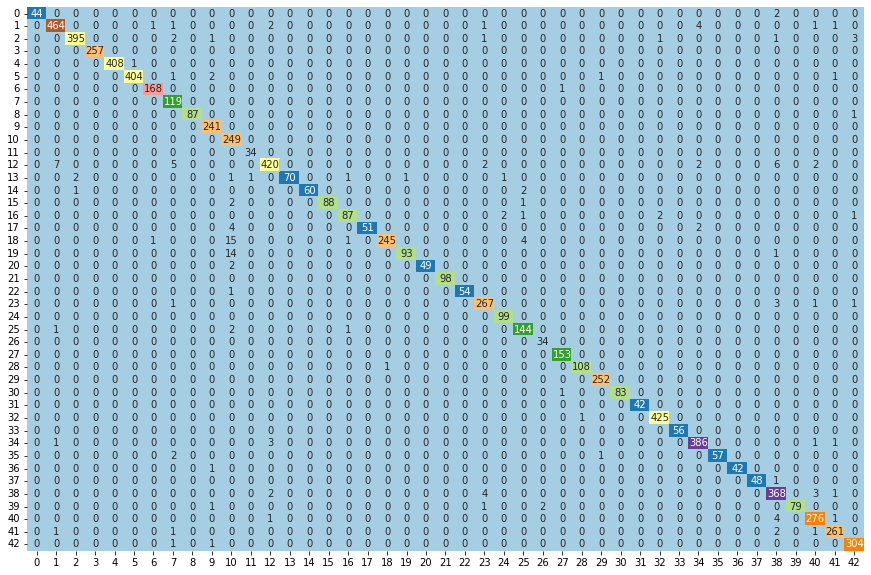

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score,confusion_matrix
import sklearn.metrics as metrics
cm12_c = metrics.confusion_matrix(y_test_arg_tk_rs, Y_pred_tk_rs_c90)
plt.figure(figsize=(15,10))
sns.heatmap(cm12_c, annot=True,cbar = False, cmap='Paired', fmt="d")
plt.show()


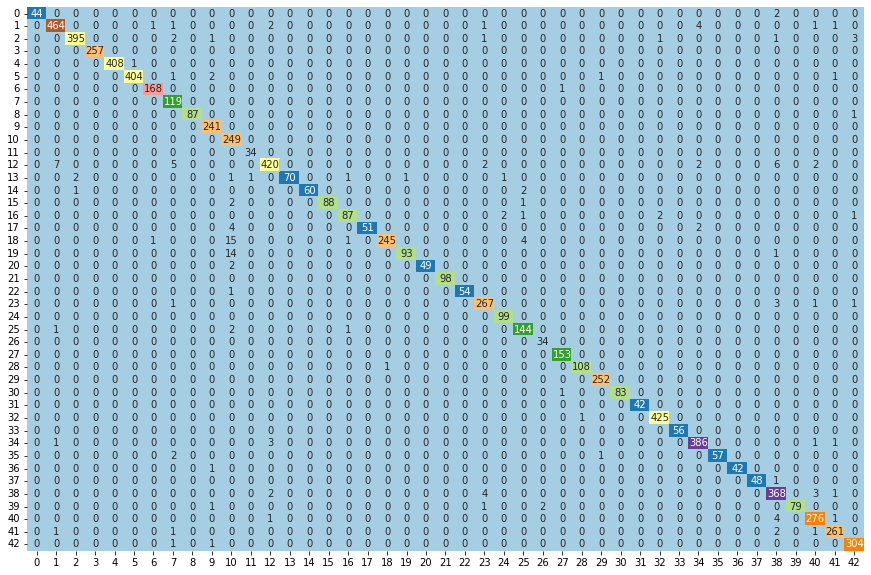

In [ ]:
cm12_ac = metrics.confusion_matrix(y_test_arg_tk_rs, Y_pred_tk_rs_ac90)
plt.figure(figsize=(15,10))
sns.heatmap(cm12_ac, annot=True,cbar = False, cmap='Paired', fmt="d")
plt.show()

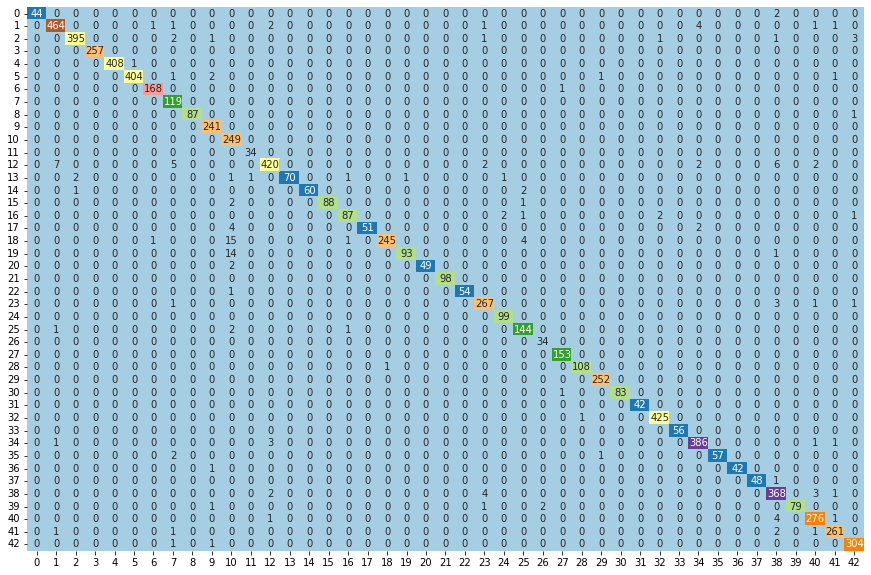

In [ ]:
cm12_wc = metrics.confusion_matrix(y_test_arg_tk_rs, Y_pred_tk_rs_180)
plt.figure(figsize=(15,10))
sns.heatmap(cm12_wc, annot=True,cbar = False, cmap='Paired', fmt="d")
plt.show()

In [ ]:
classwise_acc = cm12_c.diagonal()/cm12_c.sum(axis=1) * 100
balanced_tk_ResNet50_50_acc12_c90 = classwise_acc.tolist()

classwise_acc = cm12_ac.diagonal()/cm12_ac.sum(axis=1) * 100
balanced_tk_ResNet50_50_acc12_ac90 = classwise_acc.tolist()

classwise_acc = cm12_wc.diagonal()/cm12_wc.sum(axis=1) * 100
balanced_tk_ResNet50_50_acc12_180 = classwise_acc.tolist()

In [ ]:
zipped = list(zip(balanced_tk_ResNet50_50_acc12_c90,balanced_tk_ResNet50_50_acc12_ac90,balanced_tk_ResNet50_50_acc12_180))
df12= pd.DataFrame(zipped, columns=['clockwise_90', 'anticlockwise_90', 'rotation_180'])
df12

clockwise_90  anticlockwise_90  rotation_180
0      95.652174         95.652174     95.652174
1      97.684211         97.684211     97.684211
2      97.772277         97.772277     97.772277
3     100.000000        100.000000    100.000000
4      99.755501         99.755501     99.755501
5      98.777506         98.777506     98.777506
6      99.408284         99.408284     99.408284
7     100.000000        100.000000    100.000000
8      98.863636         98.863636     98.863636
9     100.000000        100.000000    100.000000
10    100.000000        100.000000    100.000000
11    100.000000        100.000000    100.000000
12     94.594595         94.594595     94.594595
13     90.909091         90.909091     90.909091
14     95.238095         95.238095     95.238095
15     96.703297         96.703297     96.703297
16     93.548387         93.548387     93.548387
17     89.473684         89.473684     89.473684
18     92.105263         92.105263     92.105263
19     86.111111         86.111111     86.111111
20     96.078431         96.078431     96.078431
21    100.000000        100.000000    100.000000
22     98.181818         98.181818     98.181818
23     97.802198         97.802198     97.802198
24    100.000000        100.000000    100.000000
25     97.297297         97.297297     97.297297
26    100.000000        100.000000    100.000000
27    100.000000        100.000000    100.000000
28     99.082569         99.082569     99.082569
29    100.000000        100.000000    100.000000
30     98.809524         98.809524     98.809524
31    100.000000        100.000000    100.000000
32     99.765258         99.765258     99.765258
33    100.000000        100.000000    100.000000
34     98.469388         98.469388     98.469388
35     95.000000         95.000000     95.000000
36     97.674419         97.674419     97.674419
37     97.959184         97.959184     97.959184
38     97.354497         97.354497     97.354497
39     95.180723         95.180723     95.180723
40     97.872340         97.872340     97.872340
41     98.120301         98.120301     98.120301
42     99.346405         99.346405     99.346405

In [ ]:
df12.to_csv('/content/drive/MyDrive/DBDA_PROJECT/img_rotation/balanced_tk_ResNet50_50.csv',encoding = 'utf-8-sig')


In [ ]:
# # accuracy: (tp + tn) / (p + n)
# accuracy = accuracy_score(y_test_arg_tk_rs, Y_pred_tk_rs)
# print('Accuracy: %f' % accuracy)
# # precision tp / (tp + fp)
# precision = precision_score(y_test_arg_tk_rs, Y_pred_tk_rs,average='weighted')
# print('Precision: %f' % precision)
# # recall: tp / (tp + fn)
# recall = recall_score(y_test_arg_tk_rs, Y_pred_tk_rs,average='weighted')
# print('Recall: %f' % recall)
# # f1: 2 tp / (2 tp + fp + fn)
# f1 = f1_score(y_test_arg_tk_rs, Y_pred_tk_rs,average='weighted')
# print('F1 score: %f' % f1)


In [ ]:
# mod="balanced_tk_ResNet50_50"
# data = np.array([[mod,accuracy,precision,recall,f1]]) 
# df12 = pd.DataFrame(data, columns = ['Model','Accuracy', 'Precision','Recall', 'F1 Score'])
# df12


In [ ]:
# # saving the dataframe
# df12.to_csv('/content/drive/MyDrive/DBDA_PROJECT/Gaussian_noise/balanced_tk_ResNet50_50.csv',encoding = 'utf-8-sig')


In [ ]:
# # Saving the model
# model12.save("/content/drive/MyDrive/DBDA_PROJECT/Gaussian_noise/balanced_tk_ResNet50_50.h5")


In [ ]:

# clsf_report = pd.DataFrame(classification_report(y_true =y_test_arg_tk_rs,  y_pred = Y_pred_tk_rs, output_dict=True)).transpose()
# clsf_report.to_csv('/content/drive/MyDrive/DBDA_PROJECT/Gaussian_noise/balanced_tk_ResNet50_50.csv', index= True)


## Making DataFrame of class-wise Accuracy

In [ ]:
zipped = list(zip(imbalance_cnn_acc1, imbalanced_ResNet50_152_acc2, imbalanced_ResNet_L50_acc3, balanced_SMOTE_CNN_acc4, 
balanced_SMOTE_ResNet_152_acc5, balanced_SMOTE_ResNet_50_acc6, balanced_WT_cnn_acc7, balanced_wt_ResNet_152_acc8, 
balanced_wt_ResNet_50_acc9, balanced_tk_cnn_acc10, balanced_tk_ResNet50_152_acc11, balanced_tk_ResNet50_50_acc12 ))

In [ ]:
Accuracy = pd.DataFrame(zipped, columns=['imbalance_cnn_acc1', 'imbalanced_ResNet50_152_acc2', 'imbalanced_ResNet_L50_acc3', 'balanced_SMOTE_CNN_acc4', 
'balanced_SMOTE_ResNet_152_acc5', 'balanced_SMOTE_ResNet_50_acc6', 'balanced_WT_cnn_acc7', 'balanced_wt_ResNet_152_acc8', 
'balanced_wt_ResNet_50_acc9', 'balanced_tk_cnn_acc10', 'balanced_tk_ResNet50_152_acc11', 'balanced_tk_ResNet50_50_acc12'])

In [ ]:
Accuracy

imbalance_cnn_acc1  imbalanced_ResNet50_152_acc2  \
0            66.666667                     91.666667   
1            90.088106                     96.916300   
2            99.316629                     96.127563   
3            98.867925                    100.000000   
4            99.762470                     99.762470   
5            99.537037                     98.148148   
6           100.000000                     99.382716   
7            99.145299                     97.435897   
8           100.000000                     98.765432   
9           100.000000                     96.916300   
10           97.967480                     99.186992   
11           92.857143                     61.904762   
12           86.563877                     88.546256   
13           98.245614                     70.175439   
14           82.352941                     60.294118   
15          100.000000                     90.243902   
16           91.489362                     68.085106   
17           84.905660                     94.339623   
18           99.672131                     98.360656   
19           92.907801                     97.163121   
20           87.234043                     97.872340   
21           89.000000                     82.000000   
22           94.117647                     94.117647   
23           94.827586                     93.448276   
24           94.936709                     83.544304   
25           97.333333                     79.333333   
26          100.000000                    100.000000   
27           99.270073                     99.270073   
28          100.000000                     83.132530   
29           96.396396                     98.648649   
30          100.000000                     93.548387   
31           97.872340                     82.978723   
32           99.749373                     91.729323   
33          100.000000                     77.941176   
34           97.721519                     97.468354   
35           94.936709                     73.417722   
36          100.000000                     77.551020   
37          100.000000                     65.909091   
38           96.505376                     93.010753   
39           98.863636                     98.863636   
40           94.720497                     83.229814   
41           94.814815                     91.111111   
42           98.928571                     97.142857   

    imbalanced_ResNet_L50_acc3  balanced_SMOTE_CNN_acc4  \
0                    97.222222               100.000000   
1                    97.577093                96.642686   
2                    97.266515                99.350649   
3                   100.000000                99.541284   
4                    99.762470               100.000000   
5                   100.000000                99.774266   
6                   100.000000               100.000000   
7                    98.290598               100.000000   
8                    97.530864               100.000000   
9                   100.000000               100.000000   
10                   99.186992                96.396396   
11                   85.714286                99.771689   
12                   98.017621                93.622449   
13                   94.736842                99.764706   
14                   95.588235                99.570815   
15                   96.341463               100.000000   
16                   61.702128                99.380165   
17                   84.905660               100.000000   
18                   93.442623                99.784946   
19                   96.453901                99.787234   
20                   78.723404                99.539171   
21                   97.000000                99.767981   
22                   41.176471               100.000000   
23                   89.655172                94.594595   
24                   92.405063                99.793814   
25   

In [ ]:
Accuracy.to_csv('/content/drive/MyDrive/DBDA_PROJECT/AccuracyG.csv')